# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Murder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy  as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
%matplotlib inline
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from itertools import product
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist


In [2]:
ls

Airlines+Data.xlsx               ProblemSatement(crime_data).txt
CLUSTERING AIRLINES.ipynb        Problem_Statement(Airlines).txt
CLUSTERING CRIME .ipynb          crime_data.csv
EastWestAirlines.xlsx


In [3]:
crime=pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
crime.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EXPLORATORY DATA ANALYSIS

In [5]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
crime.info()
#no null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
crime1=crime[{"Murder","Assault","UrbanPop","Rape"}]
crime1.head(5)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# DATA VISUALISATION

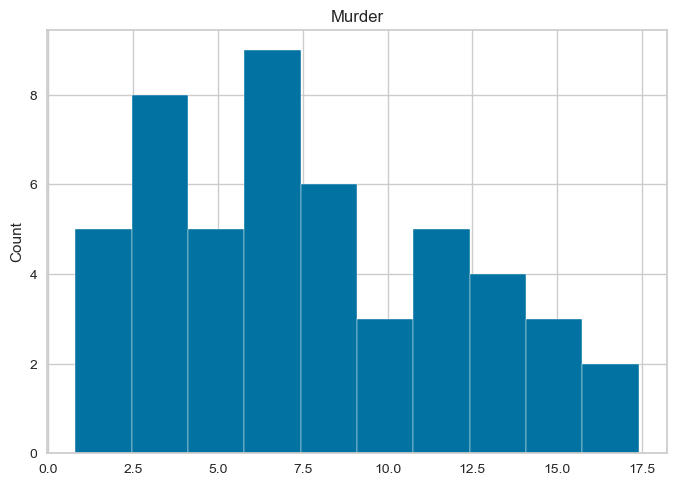

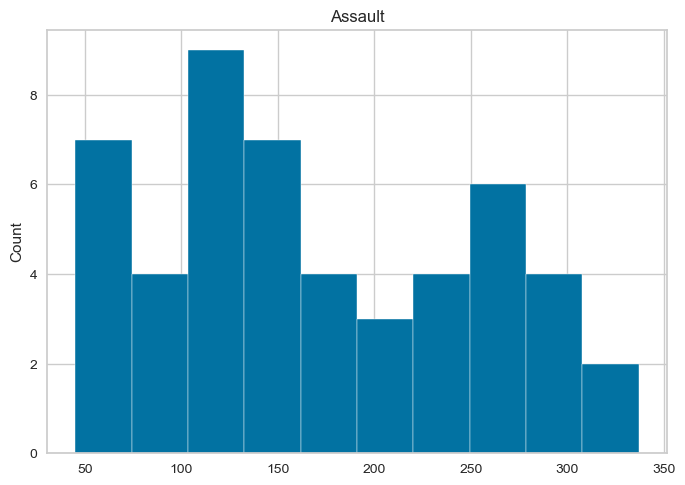

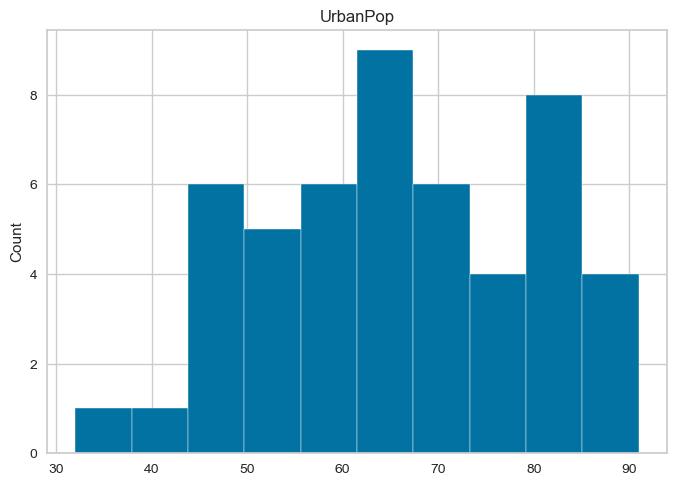

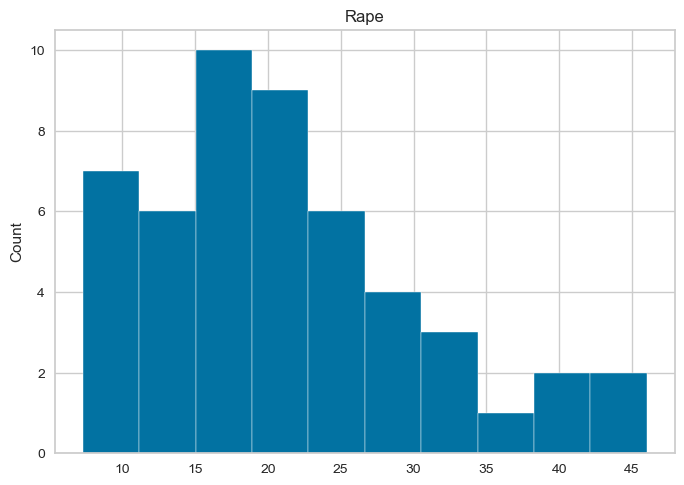

In [9]:
for f in crime1.columns:
    crime1[f].hist(bins=10)
    plt.ylabel('Count')
    plt.title(f)
    plt.show()
    

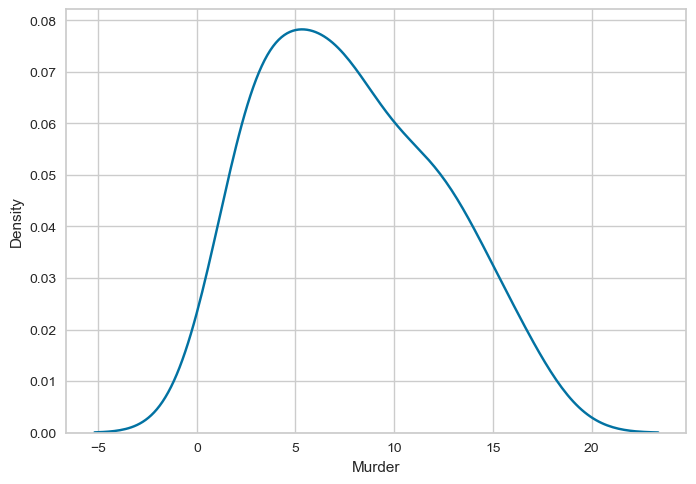

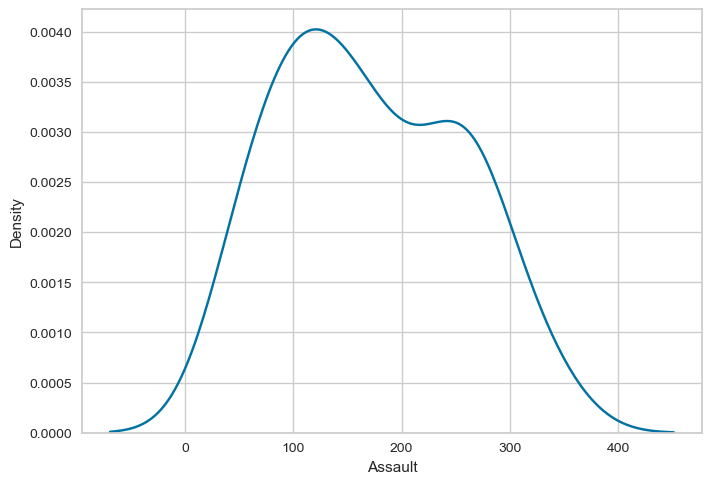

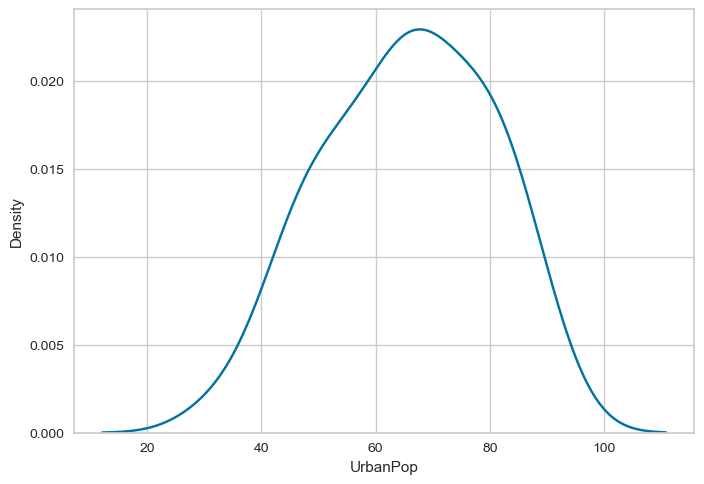

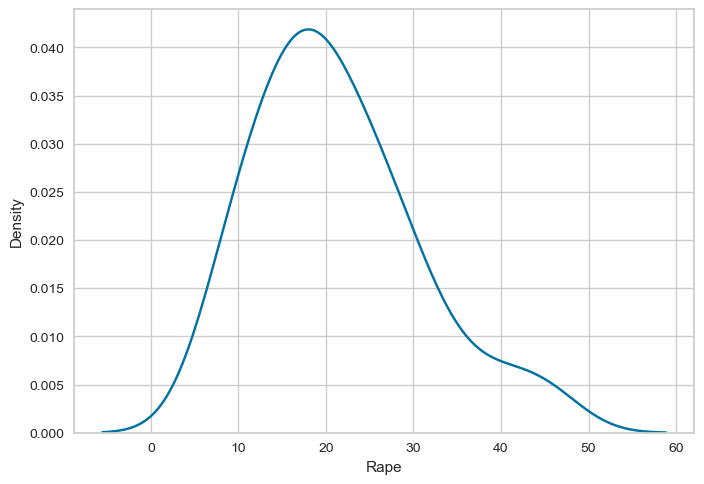

In [10]:
for n in crime1.columns:
    sns.kdeplot(crime1[n])
    plt.show()

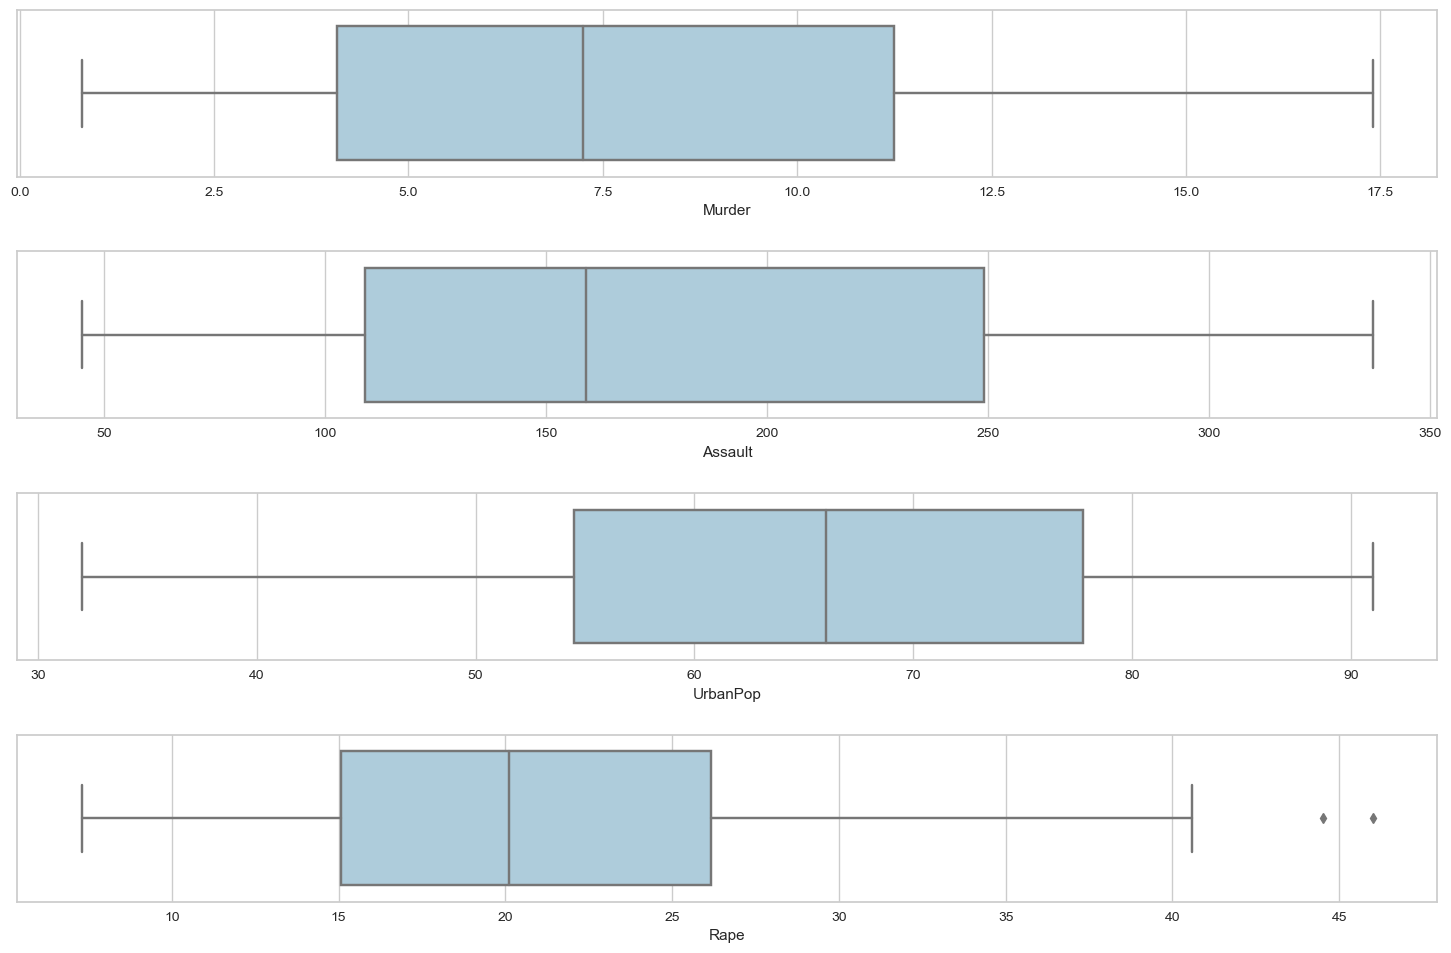

In [11]:
ot=crime.copy() 
fig, axes=plt.subplots(4,1,figsize=(15,10),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=ot,palette='Paired',ax=axes[0])
sns.boxplot(x='Assault',data=ot,palette='Paired',ax=axes[1])
sns.boxplot(x='UrbanPop',data=ot,palette='Paired',ax=axes[2])
sns.boxplot(x='Rape',data=ot,palette='Paired',ax=axes[3])
plt.tight_layout(pad=2.0)

<Axes: >

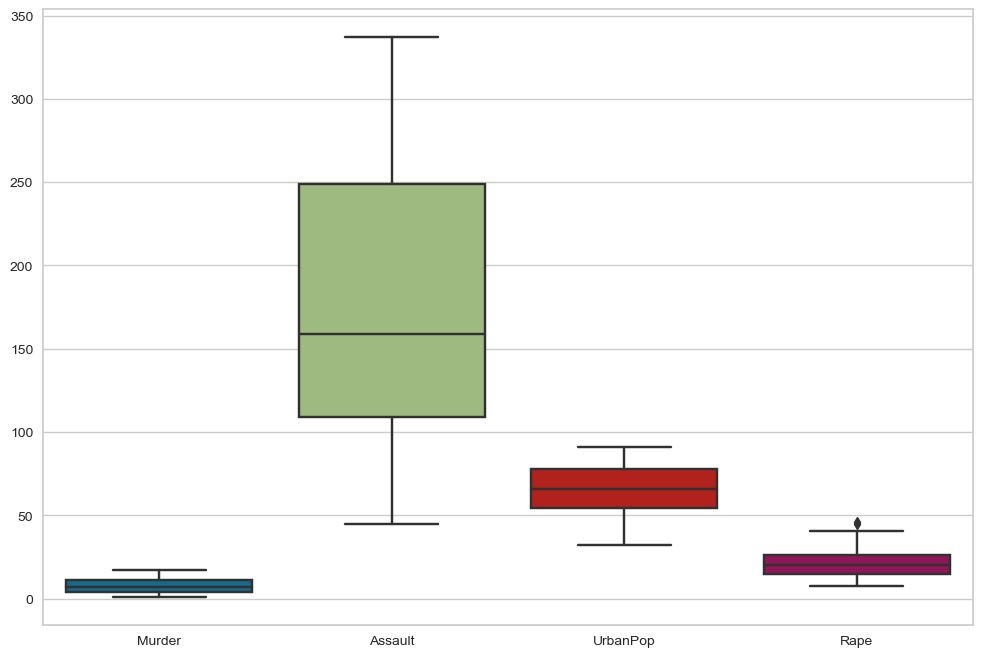

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(data=ot)

<Axes: >

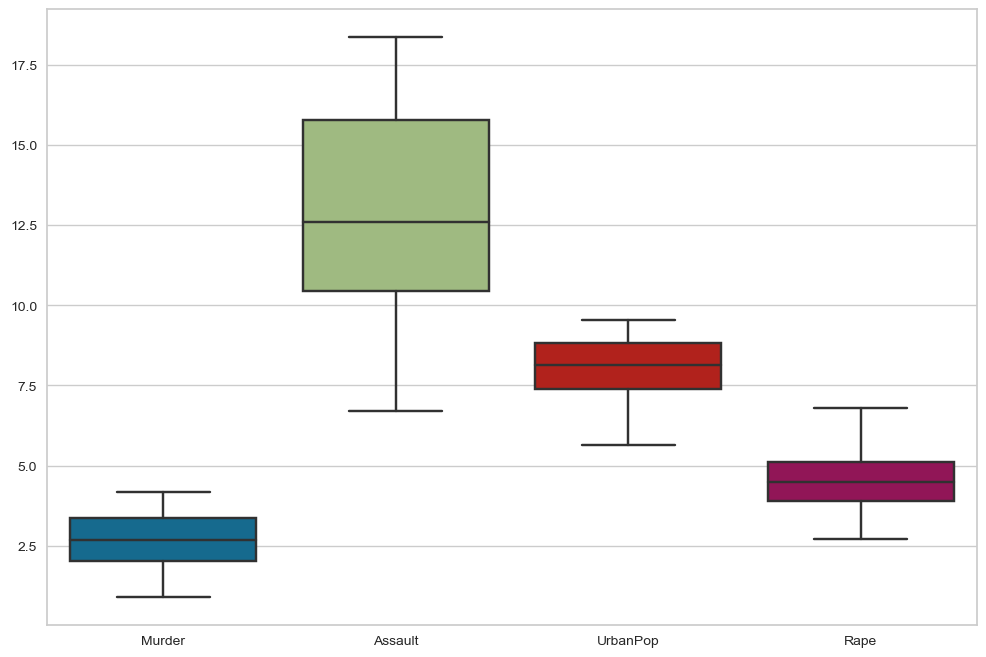

In [13]:
#Taking the square root of the data makes the large values smaller and the small values larger. 
#This helps to balance the scale of the data and makes it easier to compare the values
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(crime1))

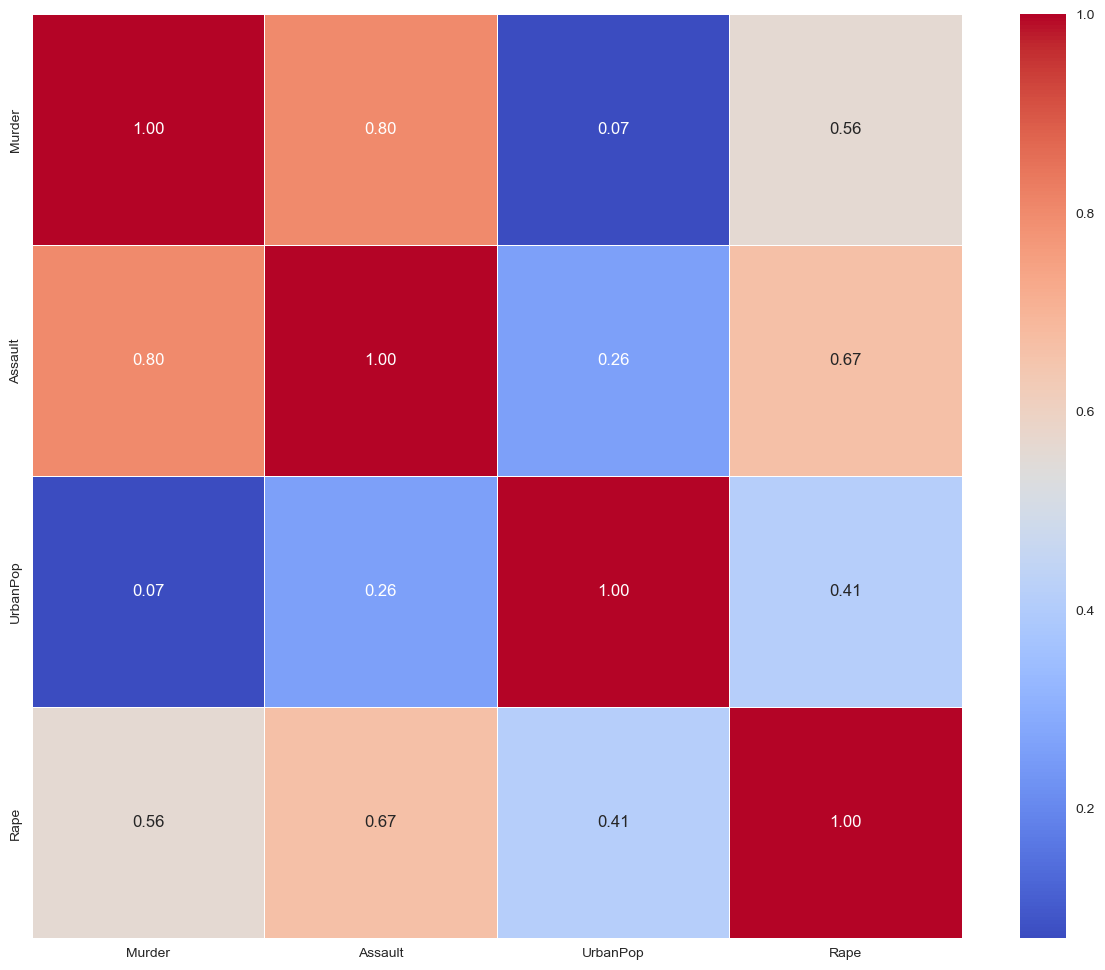

In [14]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(crime1.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax, cmap='coolwarm')
plt.show()


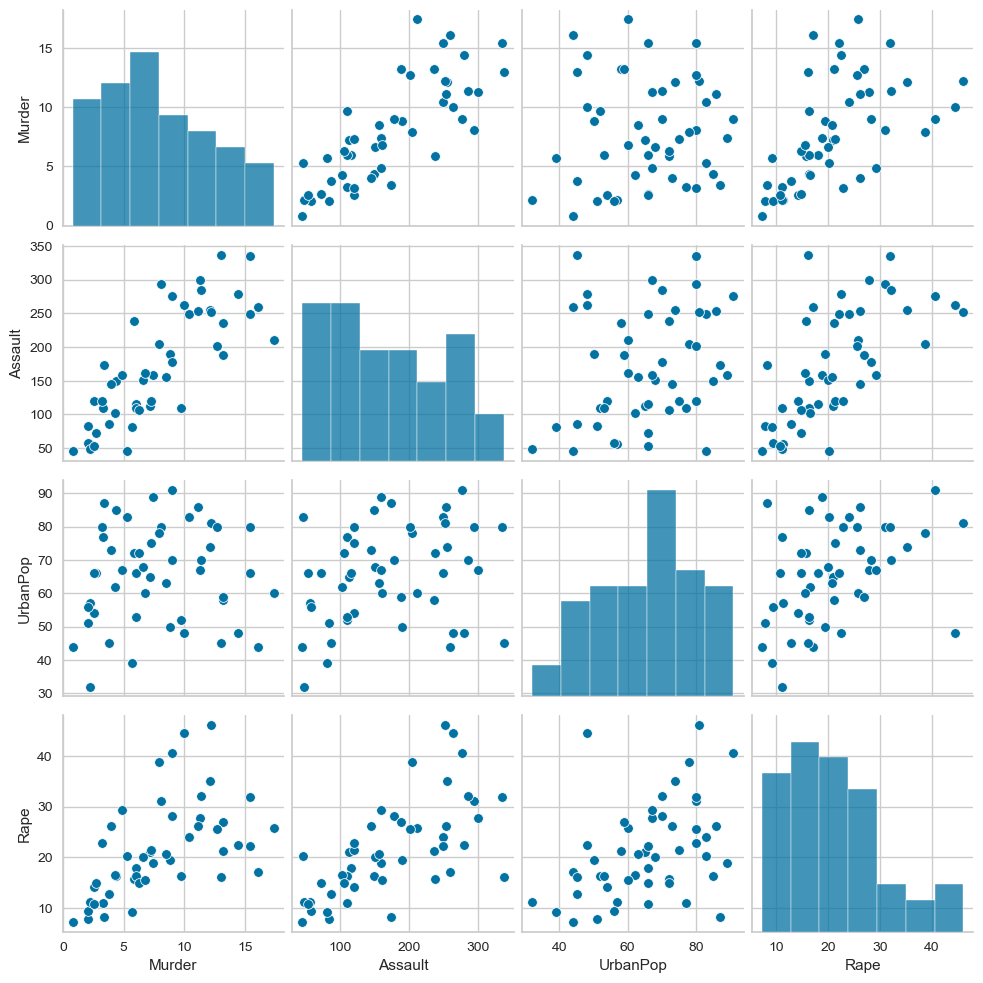

In [15]:
sns.pairplot(crime1)

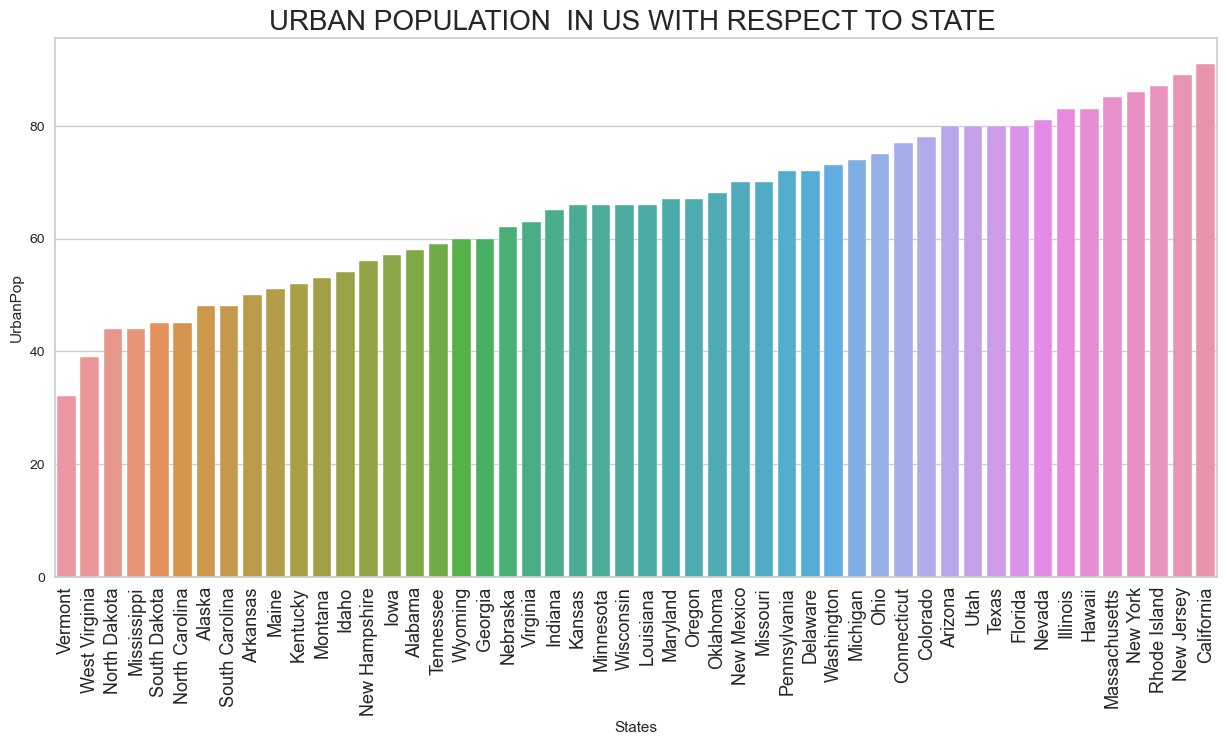

In [16]:
plt.figure(figsize=[15,7])
sns.barplot(x='States',y="UrbanPop", data=crime, order=crime.sort_values('UrbanPop').States)
plt.xticks(rotation = 90, fontsize = 13)
plt.title("URBAN POPULATION  IN US WITH RESPECT TO STATE ",size=20)
plt.show()


# MURDER

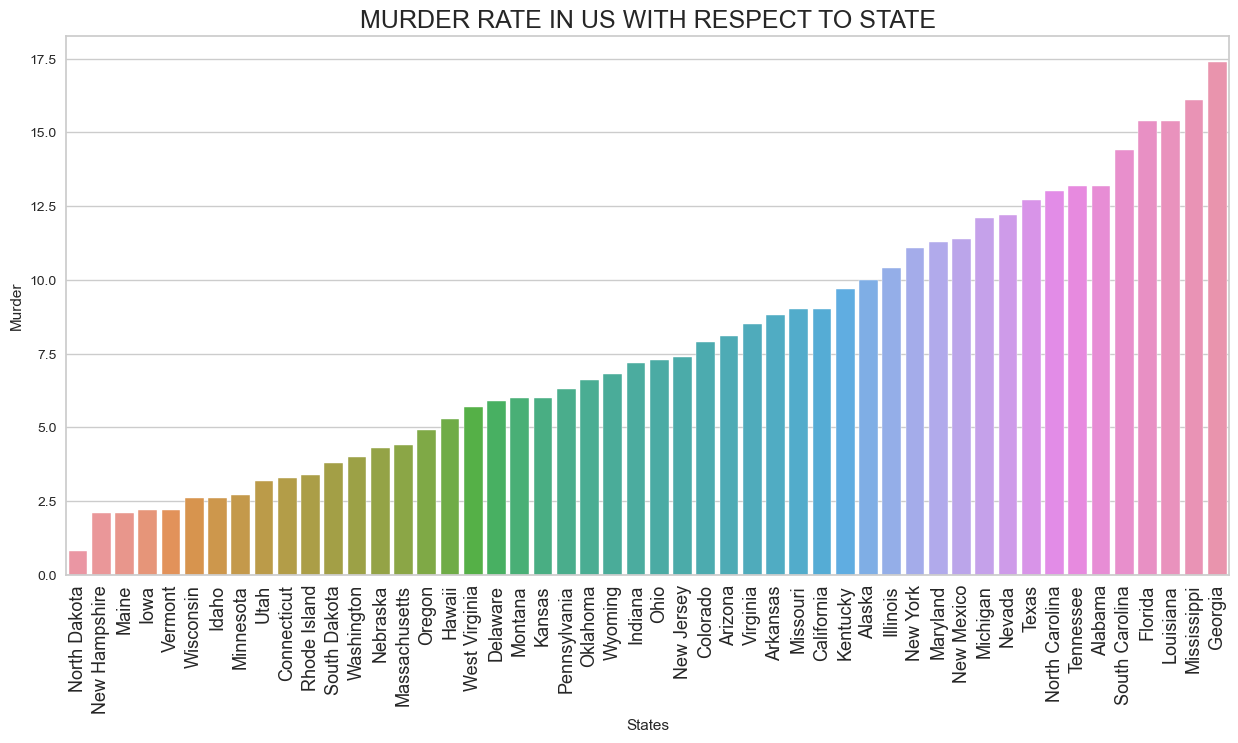

In [17]:
plt.figure(figsize=[15,7])
sns.barplot(x='States', y='Murder', data=crime.sort_values('Murder'))
plt.title("MURDER RATE IN US WITH RESPECT TO STATE", size=18)
plt.xticks(rotation=90, fontsize=13)
plt.show()

In [18]:
print('Top 10 States with Highest Murder Rate')
crime.sort_values('Murder',ascending=False).head(10)

Top 10 States with Highest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5
0,Alabama,13.2,236,58,21.2
41,Tennessee,13.2,188,59,26.9
32,North Carolina,13.0,337,45,16.1
42,Texas,12.7,201,80,25.5
27,Nevada,12.2,252,81,46.0


In [19]:
murder = crime.sort_values('Murder', ascending = False, ignore_index=True)
murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5


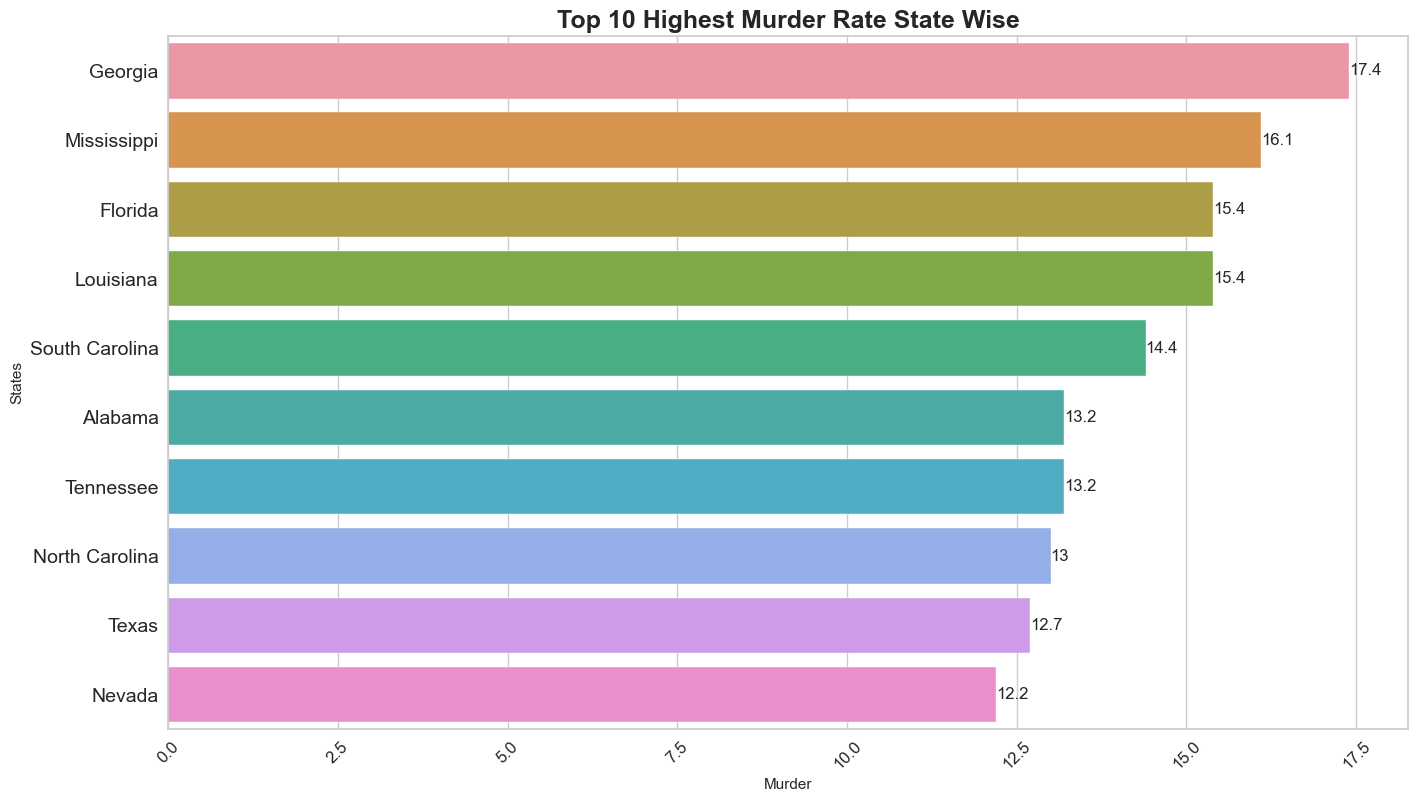

In [20]:
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=murder.Murder[:10], y=murder.States[:10])
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.title('Top 10 Highest Murder Rate State Wise', fontsize=18, fontweight='bold')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)



In [21]:
murder = crime.sort_values('Murder', ascending = True,ignore_index=True)
murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,New Hampshire,2.1,57,56,9.5
2,Maine,2.1,83,51,7.8
3,Iowa,2.2,56,57,11.3
4,Vermont,2.2,48,32,11.2


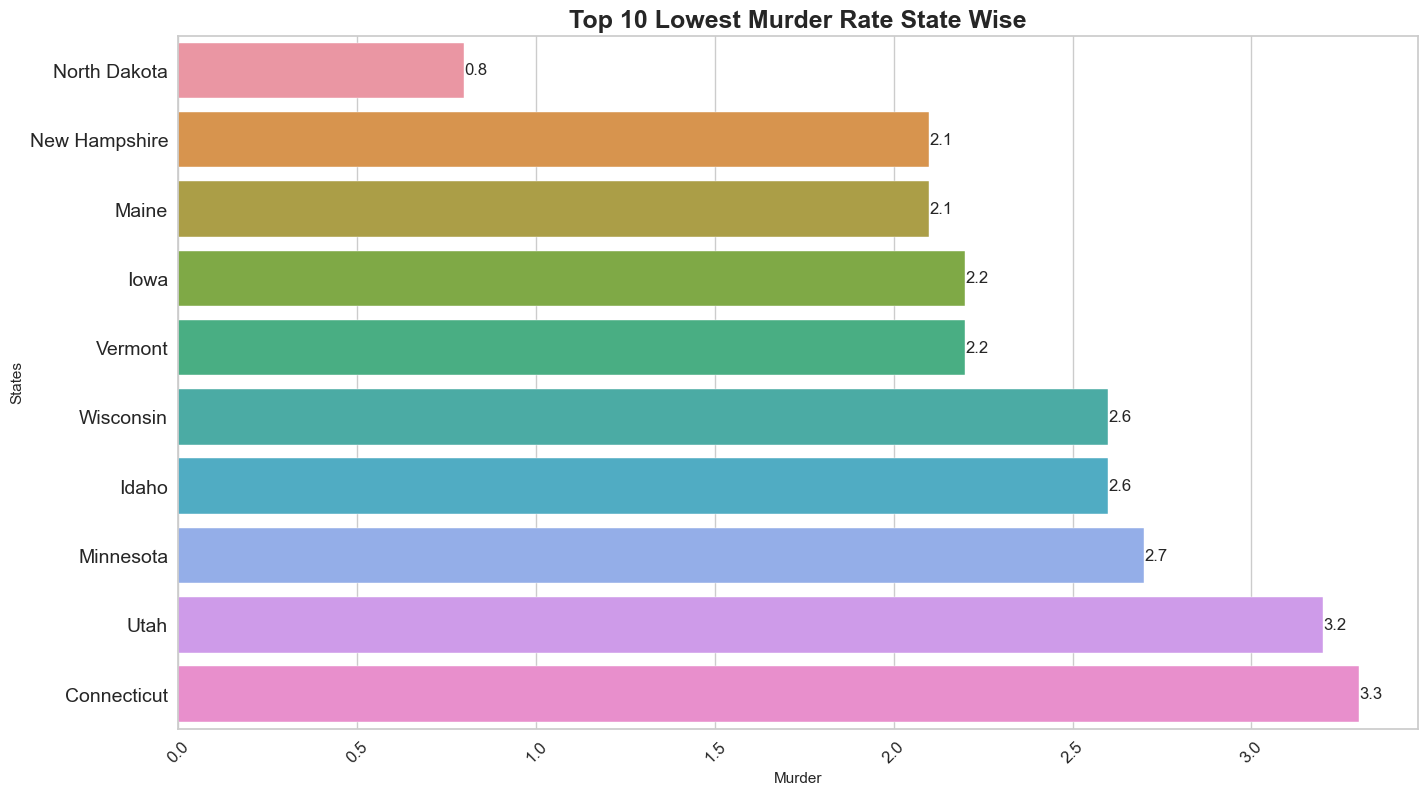

In [22]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

# ASSAULT

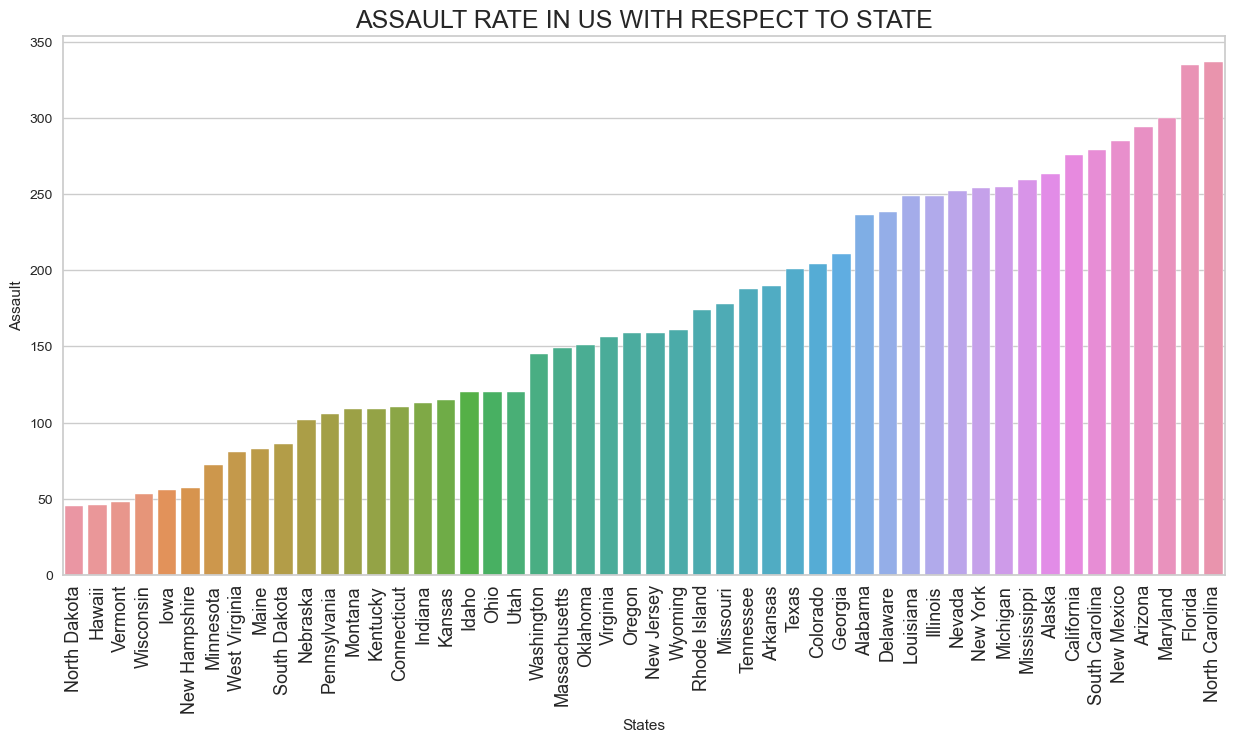

In [23]:
plt.figure(figsize=[15,7])
sns.barplot(x='States', y='Assault', data=crime.sort_values('Assault'))
plt.title("ASSAULT RATE IN US WITH RESPECT TO STATE", size=18)
plt.xticks(rotation=90, fontsize=13)
plt.show()

In [24]:
print('Top 10 States with Highest assault Rate')
crime.sort_values('Assault',ascending=False).head(10)

Top 10 States with Highest assault Rate


,States,Murder,Assault,UrbanPop,Rape
32,North Carolina,13.0,337,45,16.1
8,Florida,15.4,335,80,31.9
19,Maryland,11.3,300,67,27.8
2,Arizona,8.1,294,80,31.0
30,New Mexico,11.4,285,70,32.1
39,South Carolina,14.4,279,48,22.5
4,California,9.0,276,91,40.6
1,Alaska,10.0,263,48,44.5
23,Mississippi,16.1,259,44,17.1
21,Michigan,12.1,255,74,35.1


In [25]:
assault = crime.sort_values('Assault', ascending = False, ignore_index=True)
assault.head()

,States,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1


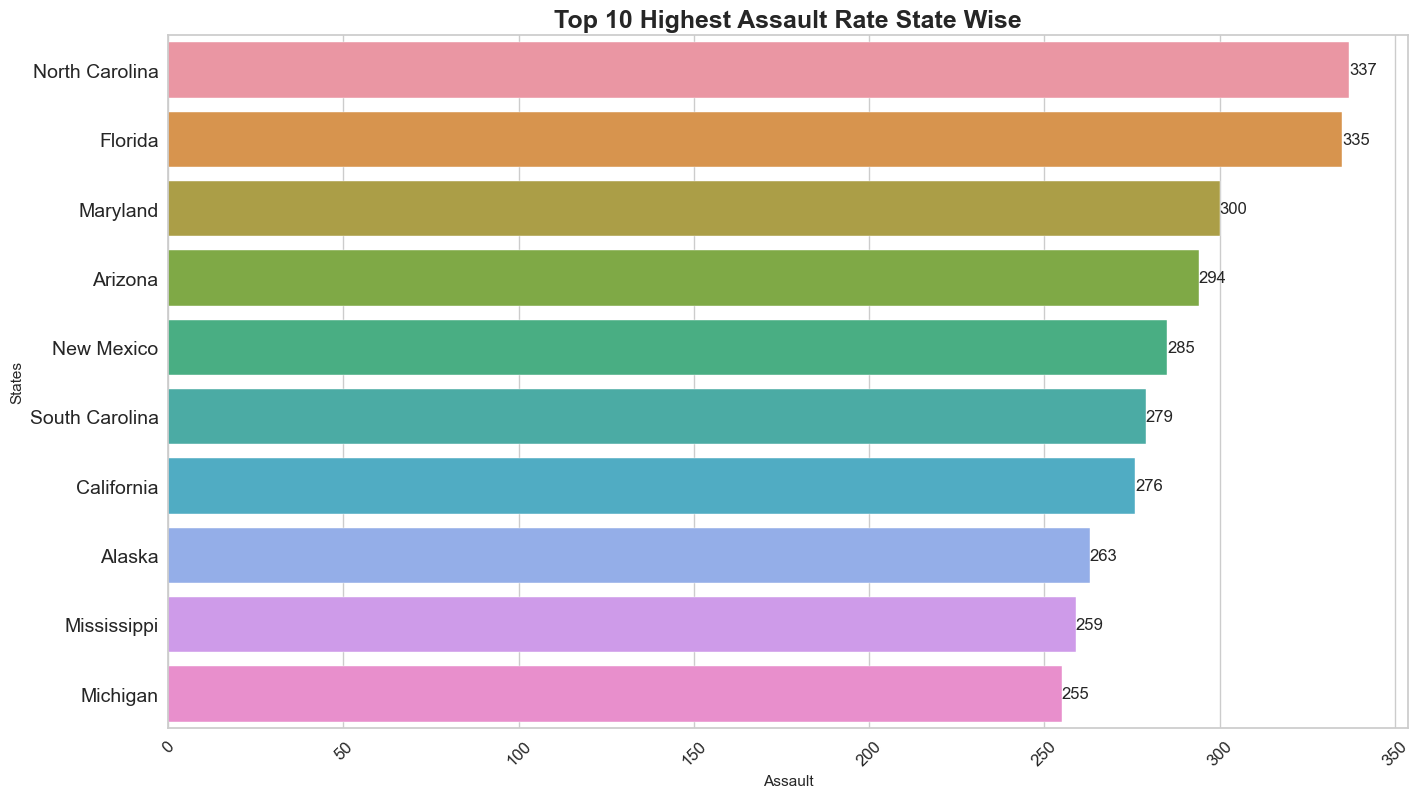

In [26]:
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=assault.Assault[:10], y=assault.States[:10])
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.title('Top 10 Highest Assault Rate State Wise', fontsize=18, fontweight='bold')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)


In [27]:
assault = crime.sort_values('Assault', ascending = True, ignore_index=True)
assault.head()


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Hawaii,5.3,46,83,20.2
2,Vermont,2.2,48,32,11.2
3,Wisconsin,2.6,53,66,10.8
4,Iowa,2.2,56,57,11.3


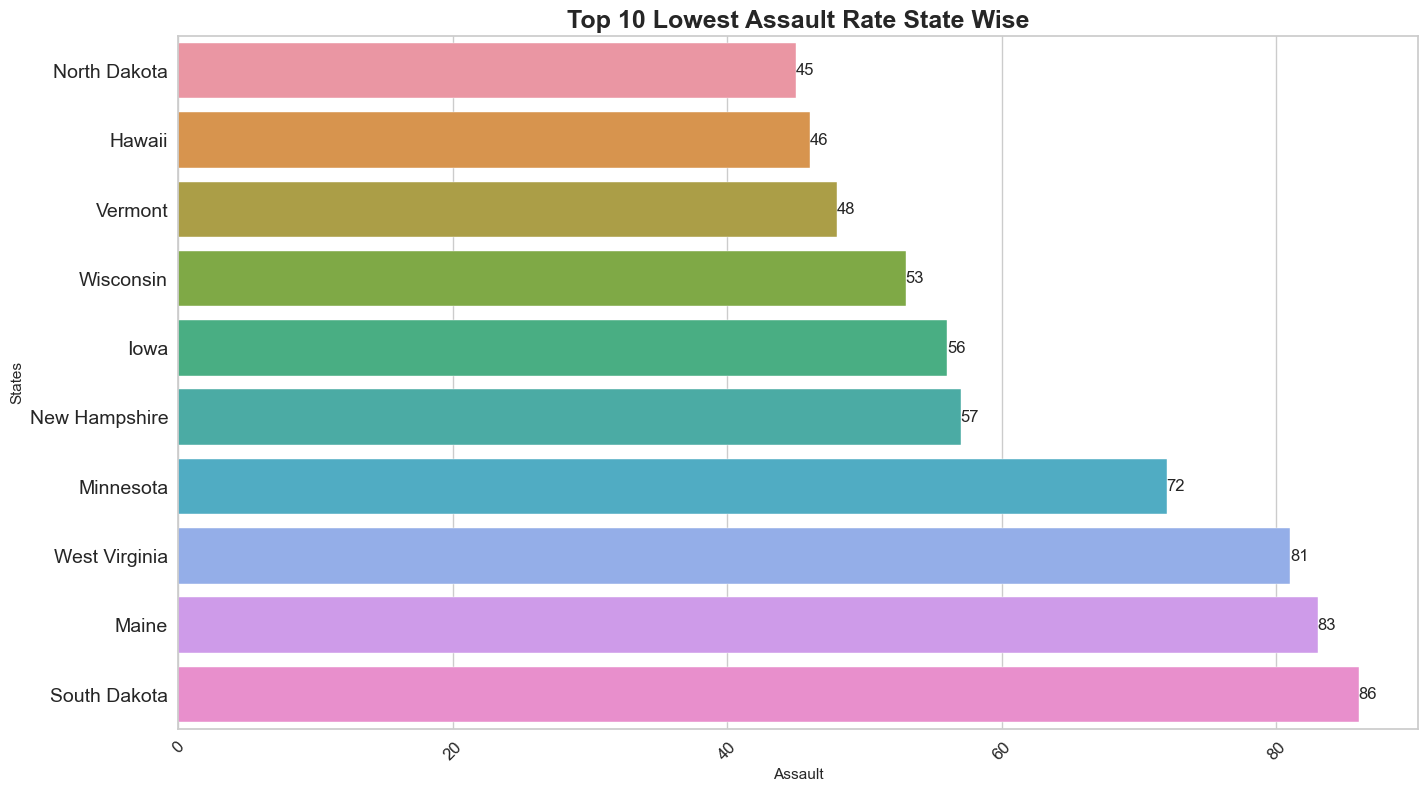

In [28]:
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=assault.Assault[:10], y=assault.States[:10])
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.title('Top 10 Lowest Assault Rate State Wise', fontsize=18, fontweight='bold')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)

# RAPE

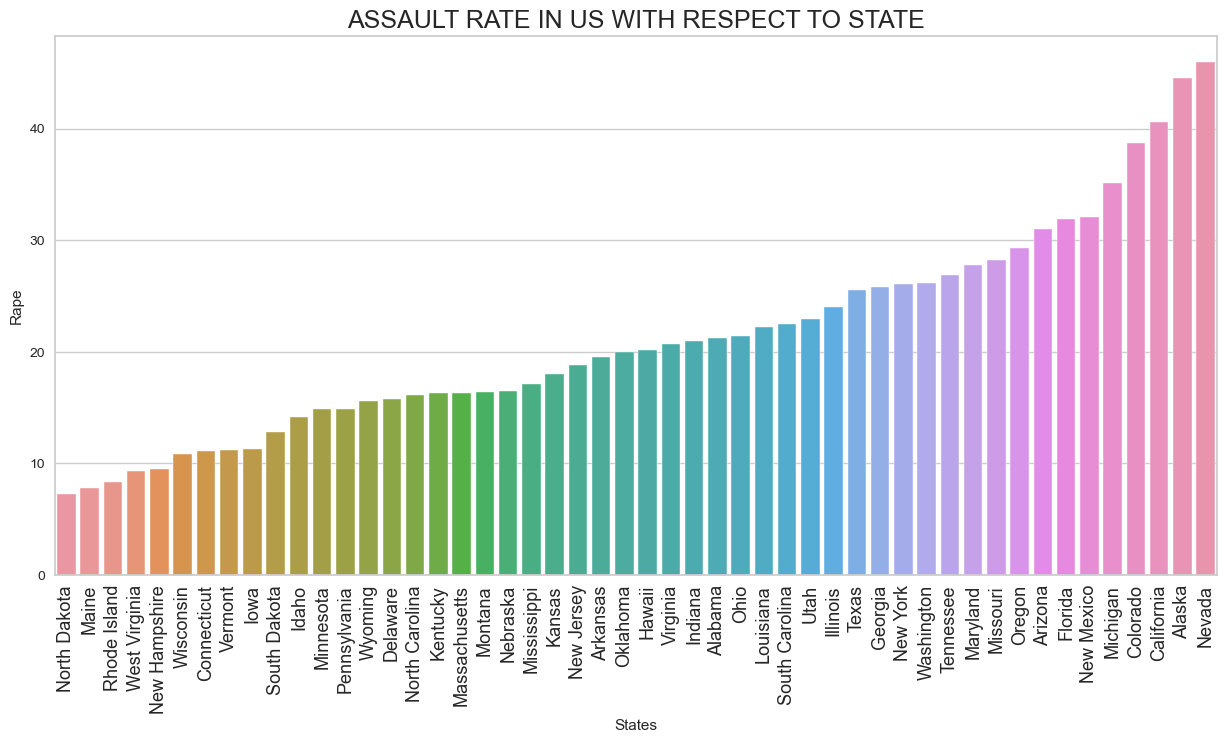

In [29]:
plt.figure(figsize=[15,7])
sns.barplot(x='States', y='Rape', data=crime.sort_values('Rape'))
plt.title("ASSAULT RATE IN US WITH RESPECT TO STATE", size=18)
plt.xticks(rotation=90, fontsize=13)
plt.show()

In [30]:
print('Top 10 States with Highest RAPE Rate')
crime.sort_values('Rape',ascending=False).head(10)

Top 10 States with Highest RAPE Rate


,States,Murder,Assault,UrbanPop,Rape
27,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
21,Michigan,12.1,255,74,35.1
30,New Mexico,11.4,285,70,32.1
8,Florida,15.4,335,80,31.9
2,Arizona,8.1,294,80,31.0
36,Oregon,4.9,159,67,29.3
24,Missouri,9.0,178,70,28.2


In [31]:
rape= crime.sort_values('Rape', ascending = False, ignore_index=True)
rape.head()

,States,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1


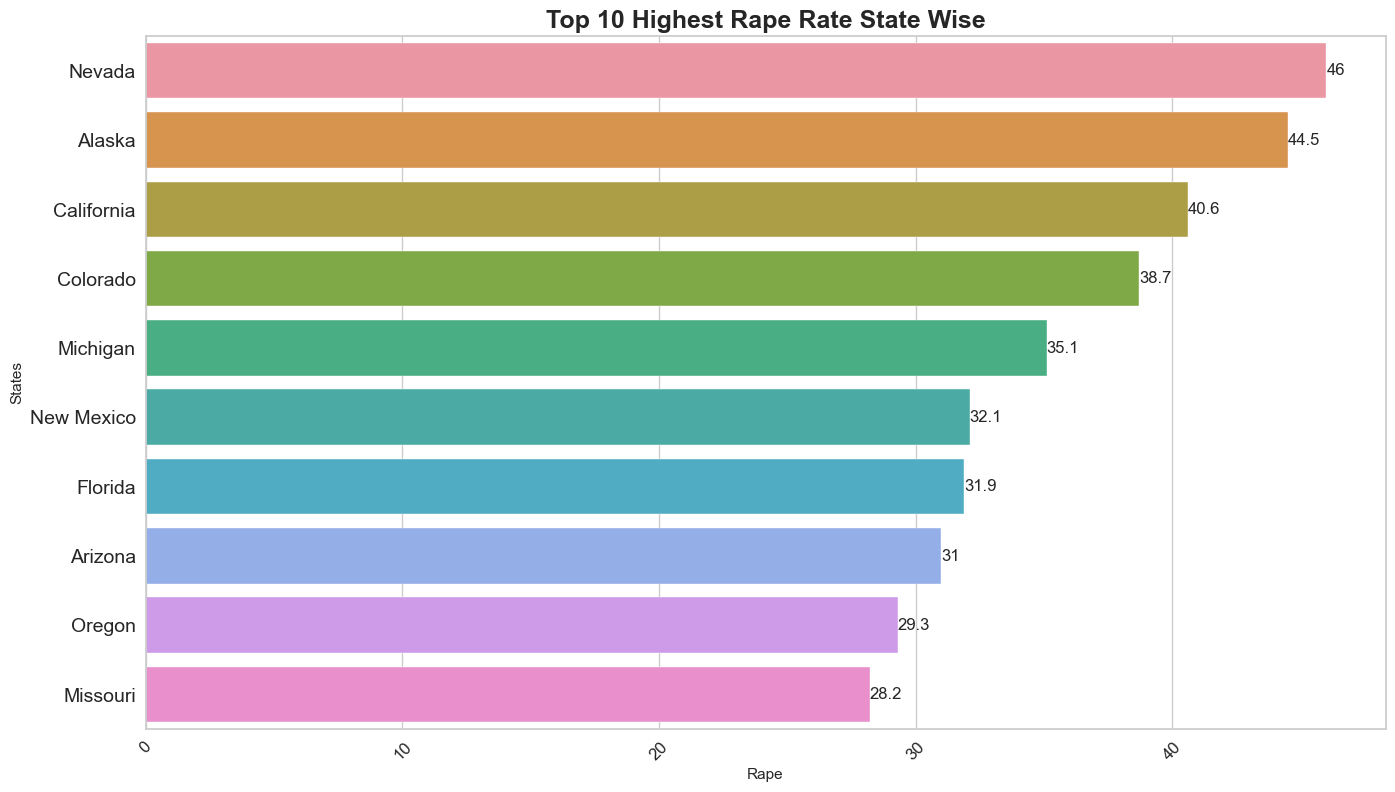

In [32]:
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=rape.Rape[:10], y=rape.States[:10])
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.title('Top 10 Highest Rape Rate State Wise', fontsize=18, fontweight='bold')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)


In [33]:
rape= crime.sort_values('Rape', ascending =True, ignore_index=True)
rape.head()

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5


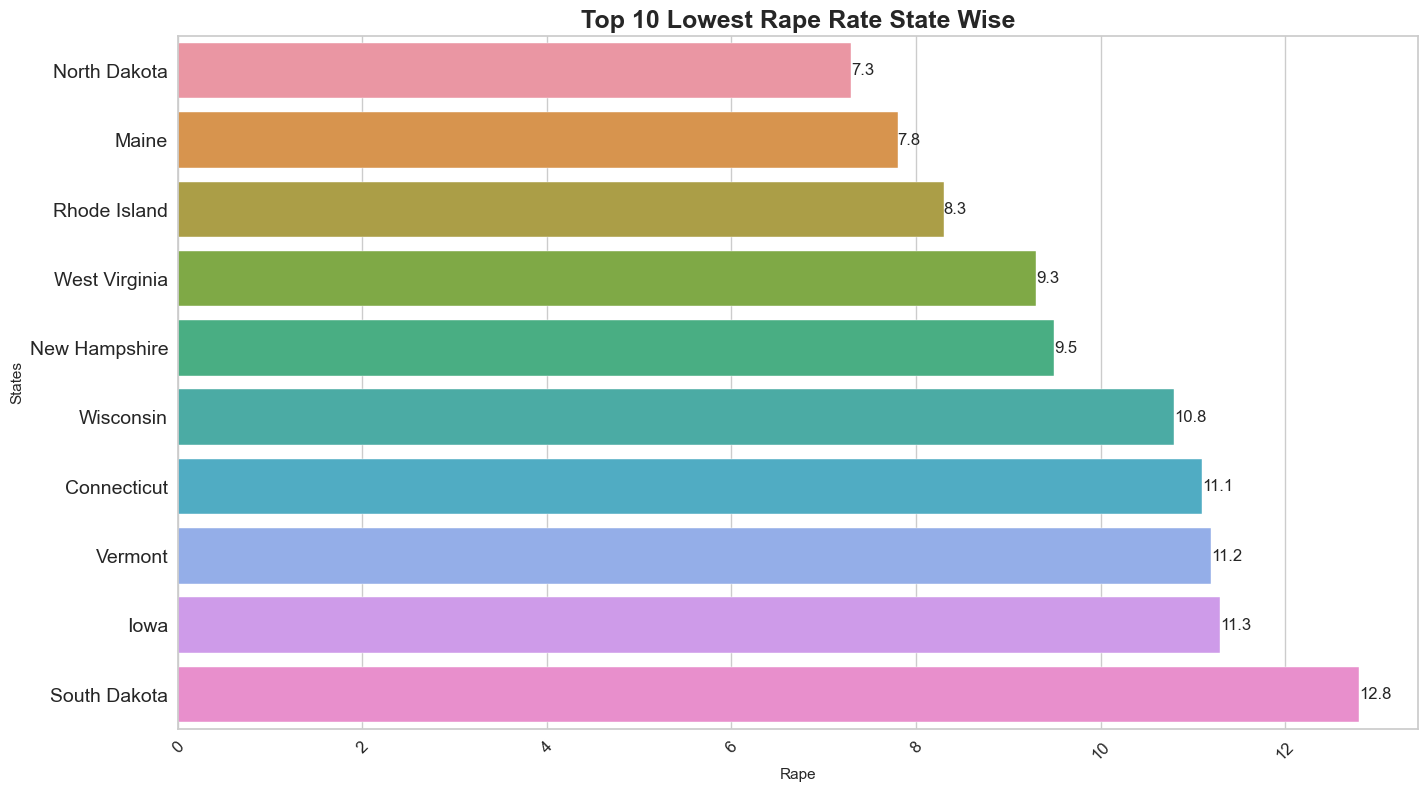

In [34]:
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=rape.Rape[:10], y=rape.States[:10])
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.title('Top 10 Lowest Rape Rate State Wise', fontsize=18, fontweight='bold')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)


# Data Preprocessing

In [35]:
crime1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [36]:
crime2= crime.set_index('States')
crime2.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [37]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(crime1)
std_df.shape

(50, 4)

In [38]:
std_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [39]:
minmax = MinMaxScaler()
mmx_df = minmax.fit_transform(crime1)
mmx_df.shape

(50, 4)

In [40]:
mmx_df

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

# KMEANS

In [41]:
cluster_range = range(1, 15)
cluster_errors = []
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(std_df)
    cluster_errors.append(kmeans.inertia_)

clusters_df = pd.DataFrame({'num_clusters': cluster_range, 'cluster_errors': cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.554259
4,5,50.333274
5,6,44.259808
6,7,40.912667
7,8,35.695877
8,9,32.575100
9,10,29.253499


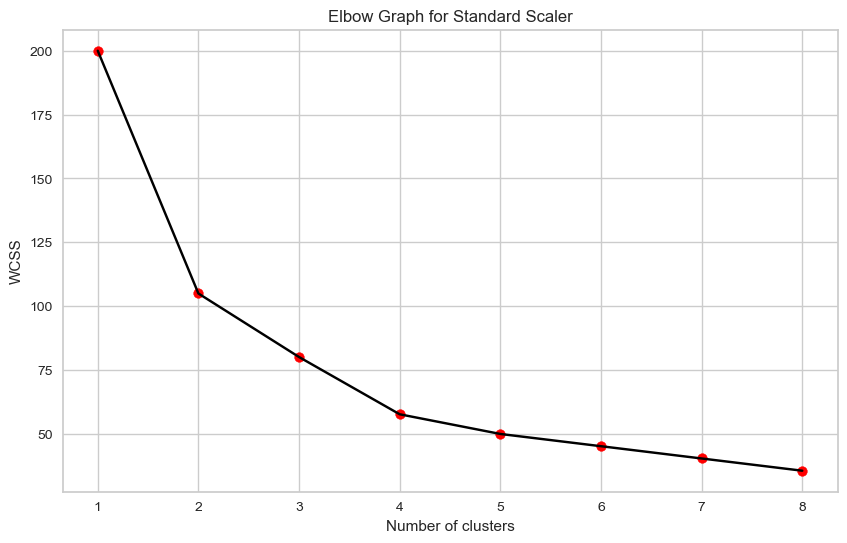

In [42]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, 9), wcss, color='black')
ax.set(title='Elbow Graph for Standard Scaler', xlabel='Number of clusters', ylabel='WCSS')
ax.scatter(range(1, 9), wcss, color='red')
plt.show()

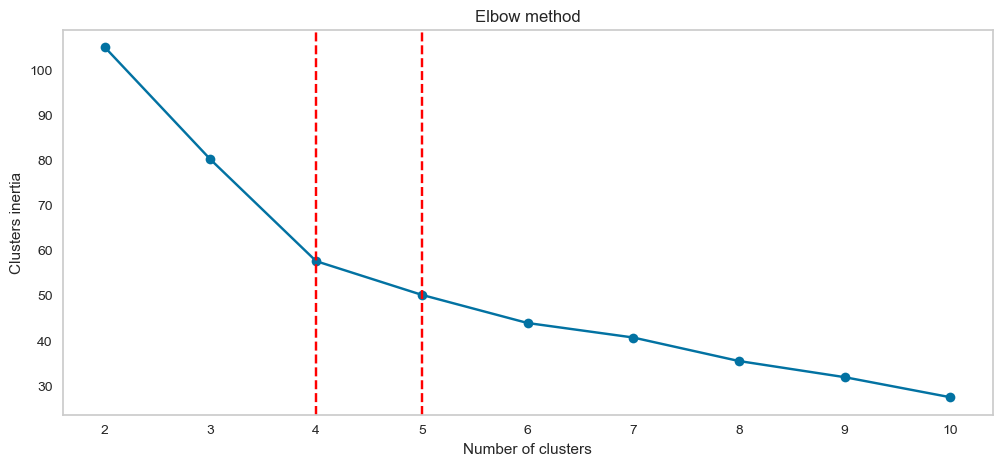

In [43]:
n_clusters = range(2, 11) # range of number of clusters to try
clusters_inertia = [] # list to store inertia values for each cluster size
s_scores = [] # list to store silhouette scores for each cluster size


for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++')
    kmeans.fit(std_df)
    
    # store the inertia and silhouette score for this number of clusters
    clusters_inertia.append(kmeans.inertia_)
    s_scores.append(silhouette_score(std_df, kmeans.labels_))
    
# plot the elbow method graph
plt.figure(figsize=(12,5))
plt.plot(n_clusters, clusters_inertia, marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Clusters inertia")
plt.xticks(n_clusters)
plt.axvline(4, ls="--", c="red")
plt.axvline(5, ls="--", c="red")
plt.grid()
plt.show()


# SILHOUETTE SCORE

# (KMEANS) Elbow Method and Silhouette Score on Standard scaler

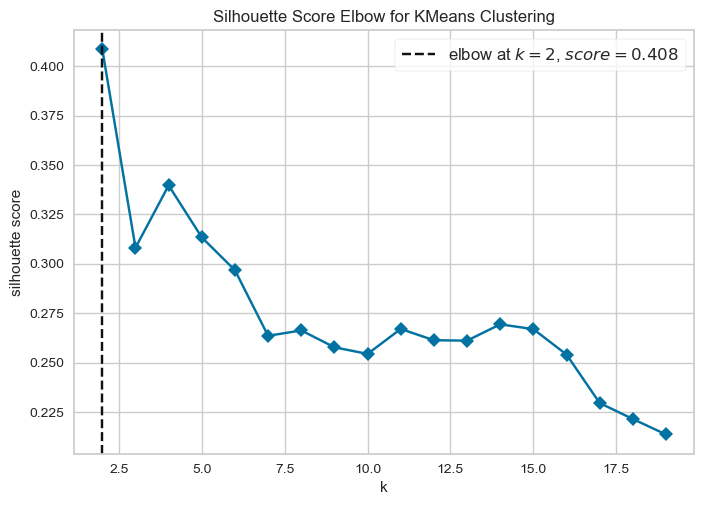

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [44]:
model_kmeans = KMeans(random_state=10, max_iter=500, init='k-means++')
visualizer = KElbowVisualizer(model_kmeans, k=(2,20), metric='silhouette', timings=False)
visualizer.fit(std_df)    
visualizer.show()


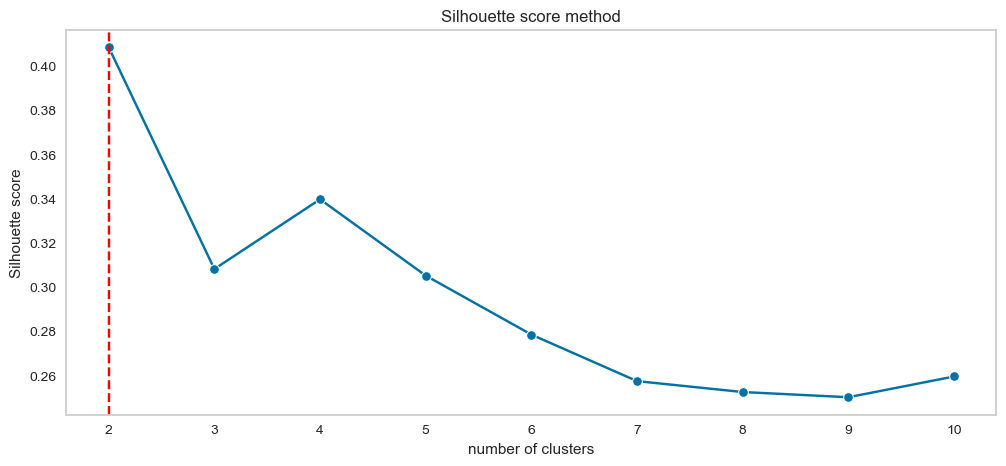

In [45]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set(title="Silhouette score method", xlabel="number of clusters", ylabel="Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [46]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [47]:
y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [48]:
model_kmeans.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [49]:
print(model_kmeans.labels_)

[1 1 1 2 1 1 2 2 1 1 2 0 1 2 0 2 0 1 0 1 2 1 0 1 2 0 0 1 0 2 1 1 1 0 2 2 2
 2 2 1 0 1 1 2 0 2 2 0 0 2]


In [50]:
model_kmeans.inertia_

80.0888613219962

In [51]:
print(model_kmeans.cluster_centers_)

[[-0.97130281 -1.11783581 -0.93954982 -0.97657842]
 [ 1.05377053  1.07340253  0.19371445  0.86104144]
 [-0.41081687 -0.32571014  0.4740874  -0.20357044]]


The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes
The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.
The Cities in Cluster-2 seems to have Moderate crime rates and can be regarded as Moderate-Zone


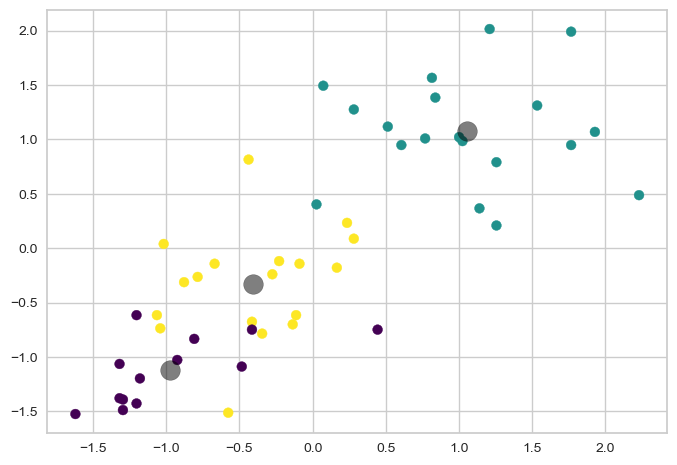

In [52]:
plt.scatter(std_df[:,0], std_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)
print("The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes")
print("The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.")
print("The Cities in Cluster-2 seems to have Moderate crime rates and can be regarded as Moderate-Zone")

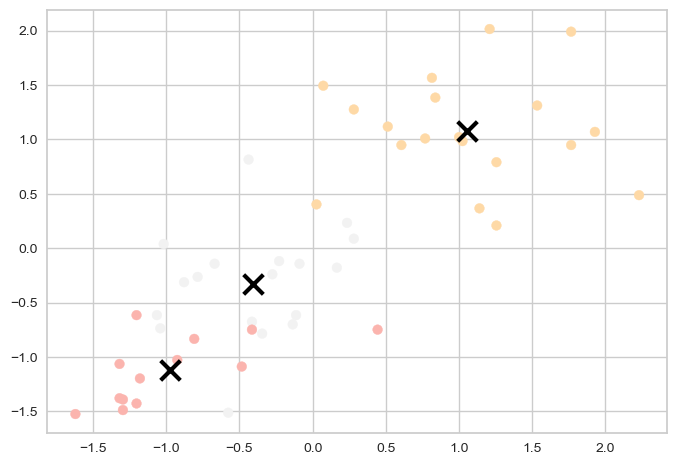

In [53]:


# scatter plot of data points colored by cluster
plt.scatter(std_df[:, 0],std_df[:, 1], c=model_kmeans.labels_, cmap='Pastel1')

# plot cluster centers
plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='black')


In [54]:
clust_list = [2,3,4,5,6,7,8,9]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)
    

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364116
For n_clusters = 8 The average silhouette_score is : 0.27329342873385337
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


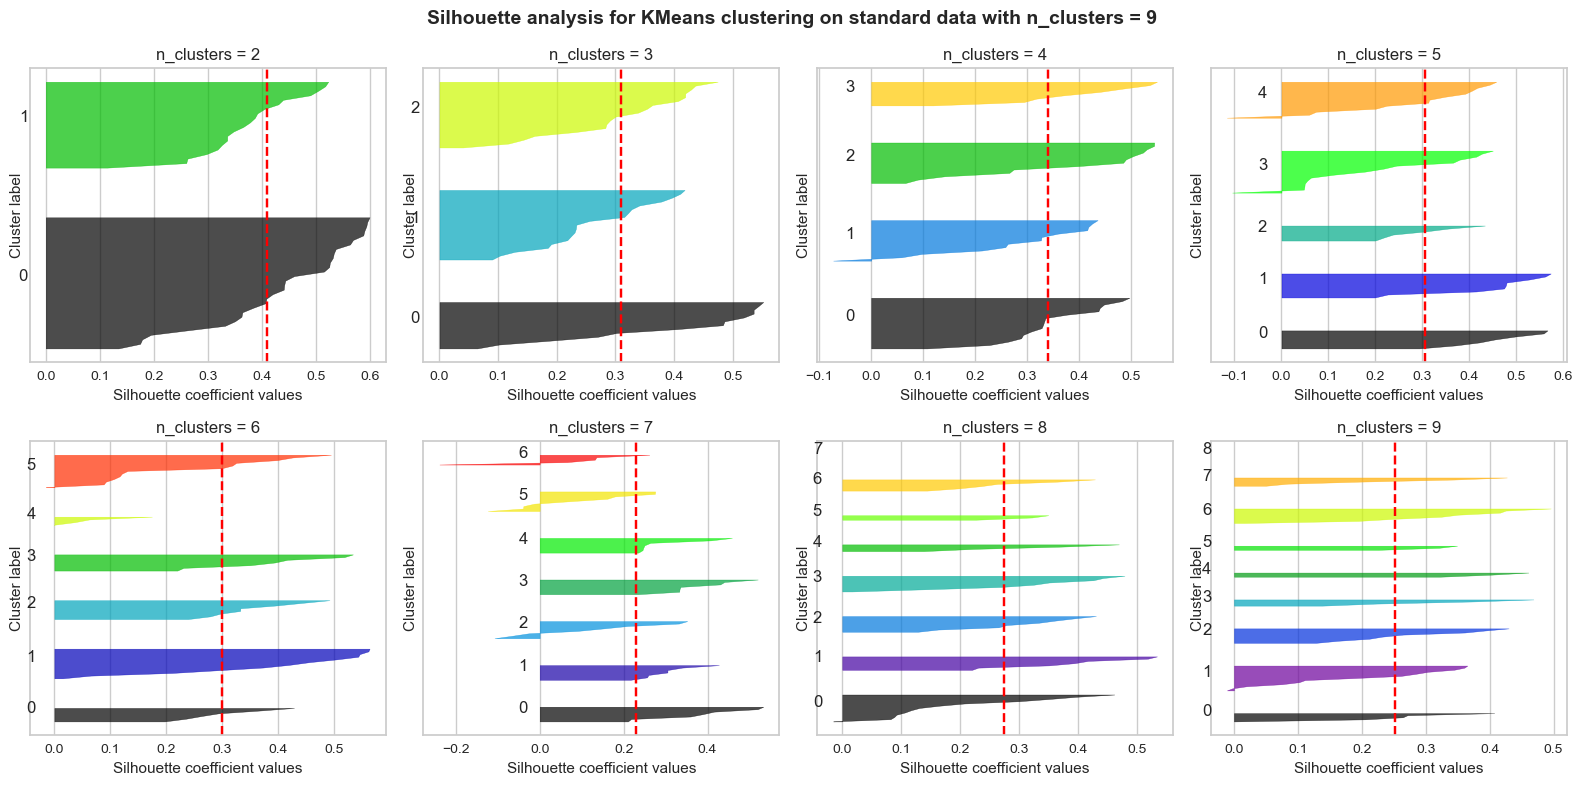

In [55]:

range_n_clusters = range(2, 10)
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()


for i, n_clusters in enumerate(range_n_clusters):
    # Fit the model and get the cluster labels
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(std_df)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(std_df, cluster_labels)
    
    # Calculate the silhouette plot
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)
    y_lower = 10
    plt.suptitle(("Silhouette analysis for KMeans clustering on standard data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    for j in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    # Plot the silhouette score
    axs[i].axvline(x=silhouette_avg, color="red", linestyle="--")
    axs[i].set_title("n_clusters = {}".format(n_clusters))
    axs[i].set_xlabel("Silhouette coefficient values")
    axs[i].set_ylabel("Cluster label")
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()


In [56]:
crime['Kmeans_label'] = model_kmeans.labels_

In [57]:
crime.head()

,States,Murder,Assault,UrbanPop,Rape,Kmeans_label
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


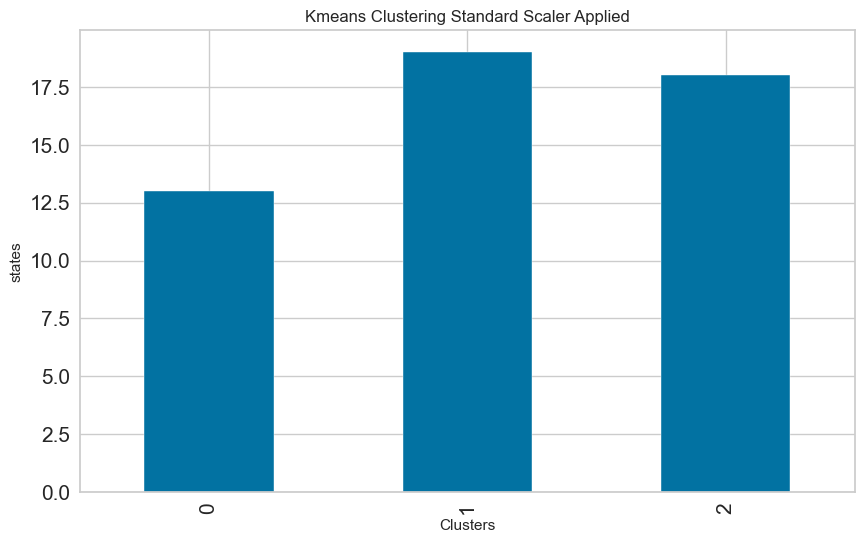

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
crime.groupby('Kmeans_label')['States'].count().plot(kind='bar')
ax.set(title='Kmeans Clustering Standard Scaler Applied', xlabel='Clusters', ylabel='states')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


# (KMEANS) Elbow Method and Silhouette Score on MinMaxScaler

In [59]:
cluster_range = range(1, 15)
cluster_errors = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(mmx_df)
    cluster_errors.append(kmeans.inertia_)
    
clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df


,num_clusters,cluster_errors
0,1,13.184123
1,2,6.596894
2,3,5.010878
3,4,3.683456
4,5,3.191136
5,6,2.858072
6,7,2.633743
7,8,2.465172
8,9,2.045375
9,10,1.885999


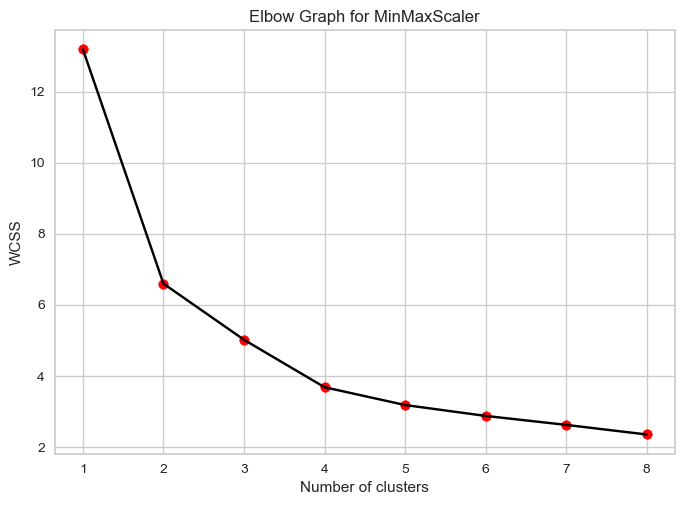

In [60]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(mmx_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

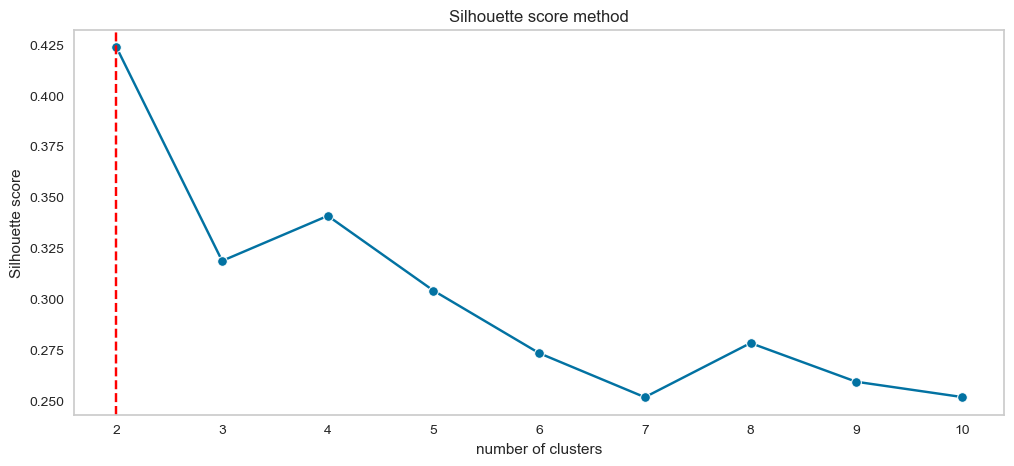

In [61]:

n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(mmx_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(mmx_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

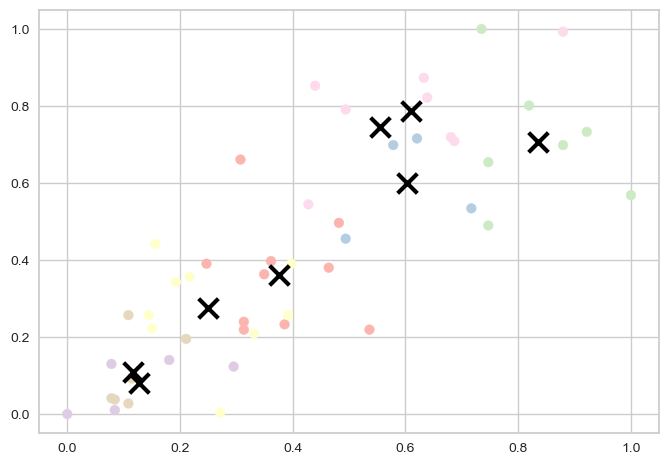

In [62]:
plt.scatter(mmx_df[:, 0],mmx_df[:, 1], c=kmeans.labels_, cmap='Pastel1')

# plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='black')


Elbow Plot for MinMaxScaler data


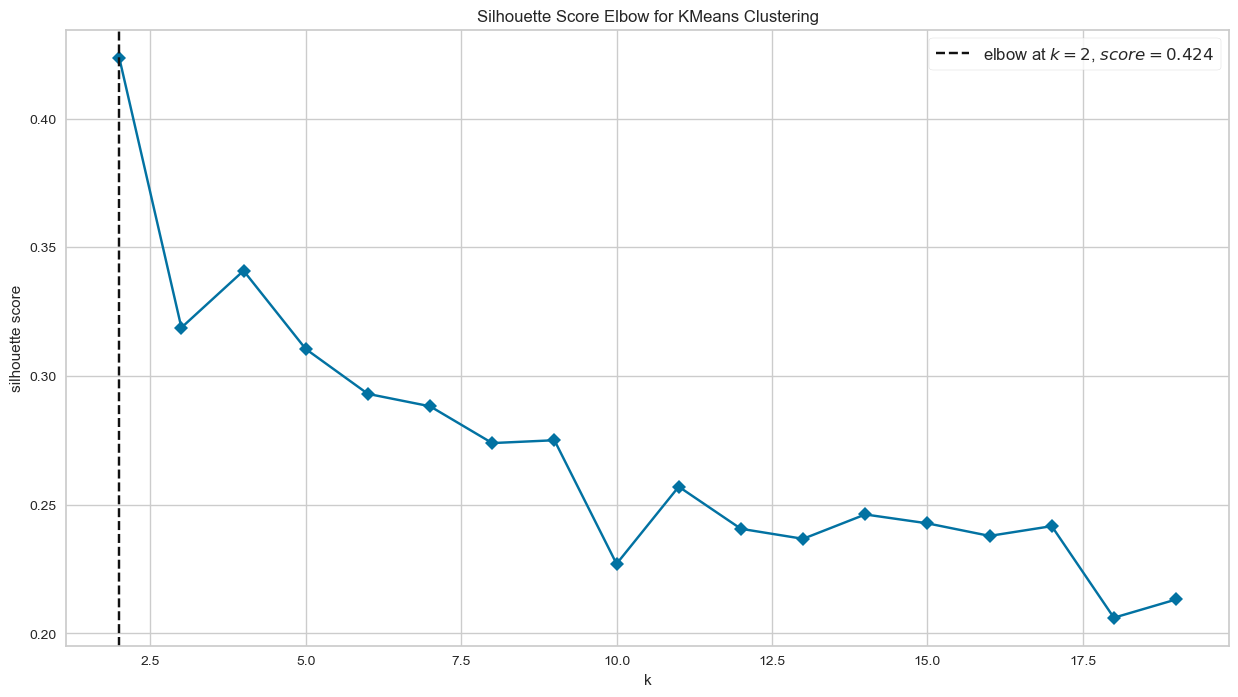

In [63]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')


visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

print('Elbow Plot for MinMaxScaler data')
plt.figure(figsize=[15,8])
visualizer.fit(mmx_df)    
visualizer.poof()
plt.show()

The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes
The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.
The Cities in Cluster-2 seems to have Moderate crime rates and can be regarded as Moderate-Zone


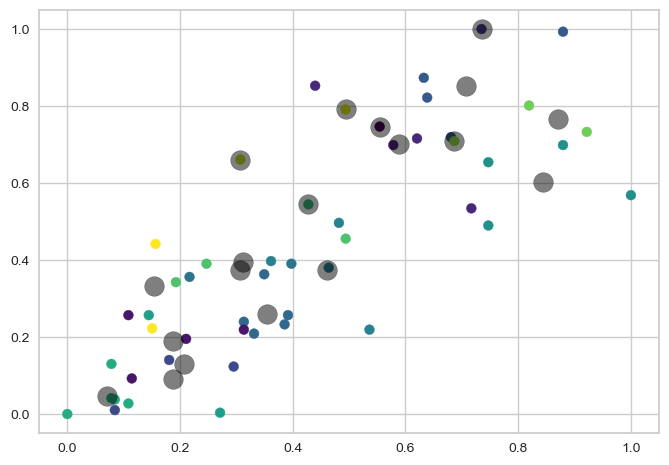

In [64]:
plt.scatter(mmx_df[:,0], mmx_df[:,1], c = model.labels_, s = 50, cmap = "viridis")

centers = model.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)
print("The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes")
print("The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.")
print("The Cities in Cluster-2 seems to have Moderate crime rates and can be regarded as Moderate-Zone")

In [65]:
clust_list = [2,3,4,5,6,7,8,9]



for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(mmx_df)
    sil_score1= sil(mmx_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.34089035600743645
For n_clusters = 5 The average silhouette_score is : 0.3062742525752849
For n_clusters = 6 The average silhouette_score is : 0.27035587392051724
For n_clusters = 7 The average silhouette_score is : 0.23711197479268142
For n_clusters = 8 The average silhouette_score is : 0.2442234536910423
For n_clusters = 9 The average silhouette_score is : 0.23181794623773666


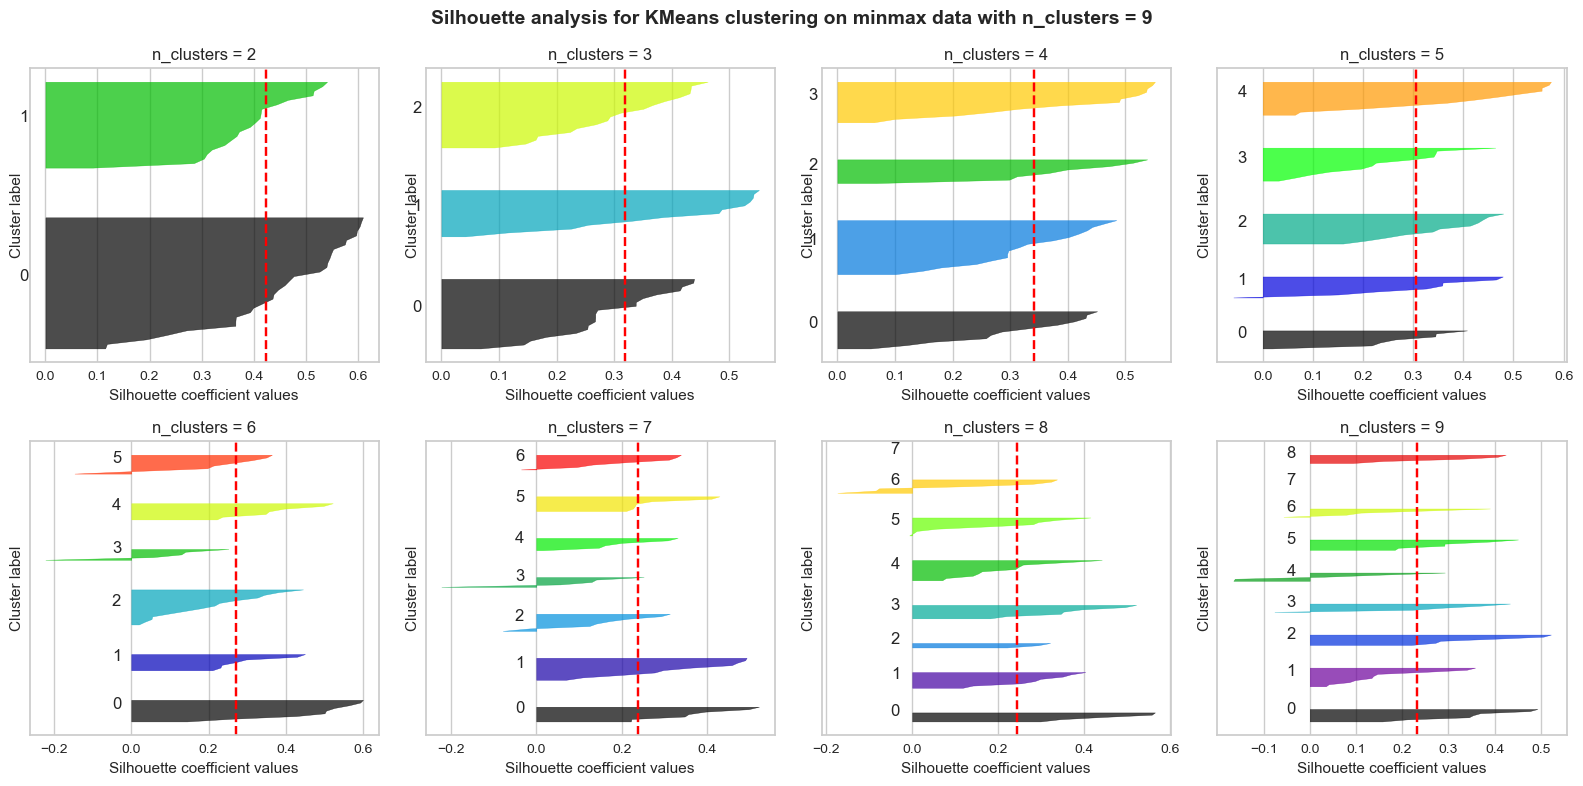

In [66]:

range_n_clusters = range(2, 10)
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()


for i, n_clusters in enumerate(range_n_clusters):
    # Fit the model and get the cluster labels
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(mmx_df)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(mmx_df, cluster_labels)
    
    # Calculate the silhouette plot
    sample_silhouette_values = silhouette_samples(mmx_df, cluster_labels)
    y_lower = 10
    plt.suptitle(("Silhouette analysis for KMeans clustering on minmax data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    for j in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    # Plot the silhouette score
    axs[i].axvline(x=silhouette_avg, color="red", linestyle="--")
    axs[i].set_title("n_clusters = {}".format(n_clusters))
    axs[i].set_xlabel("Silhouette coefficient values")
    axs[i].set_ylabel("Cluster label")
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()


# HIERACHICAL CLUSTERING

# DENDROGRAM FOR MINMAX SCALED DATA

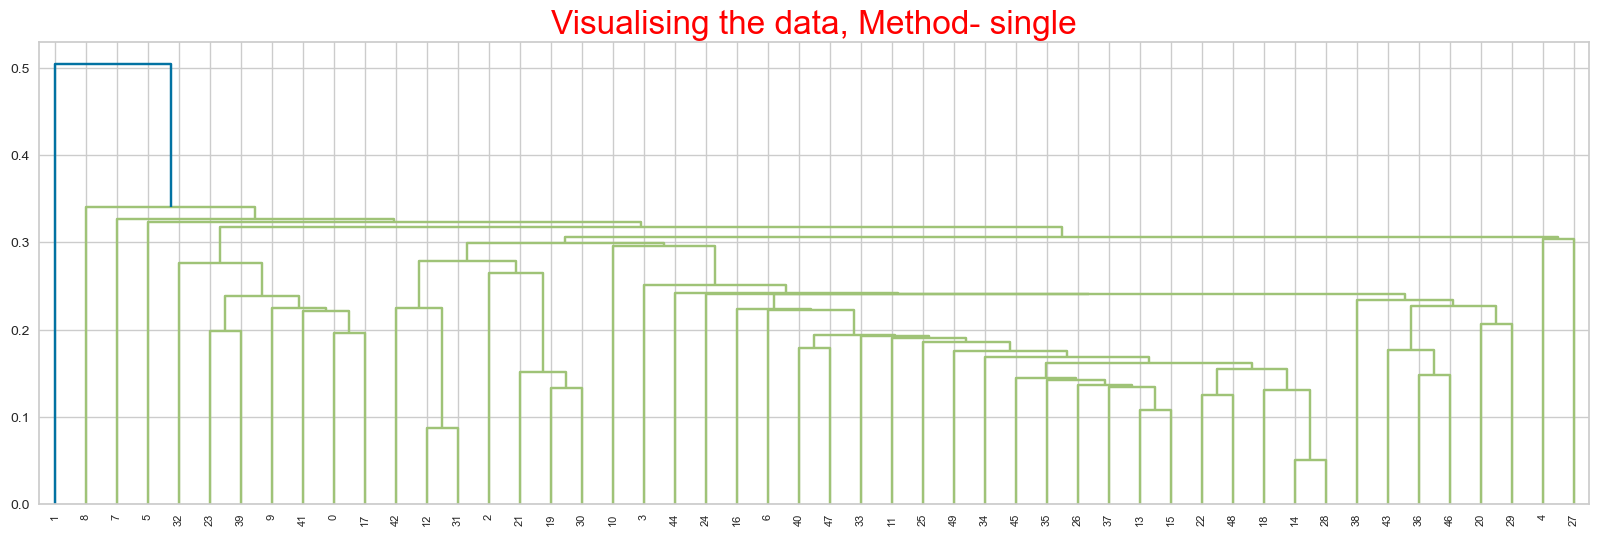

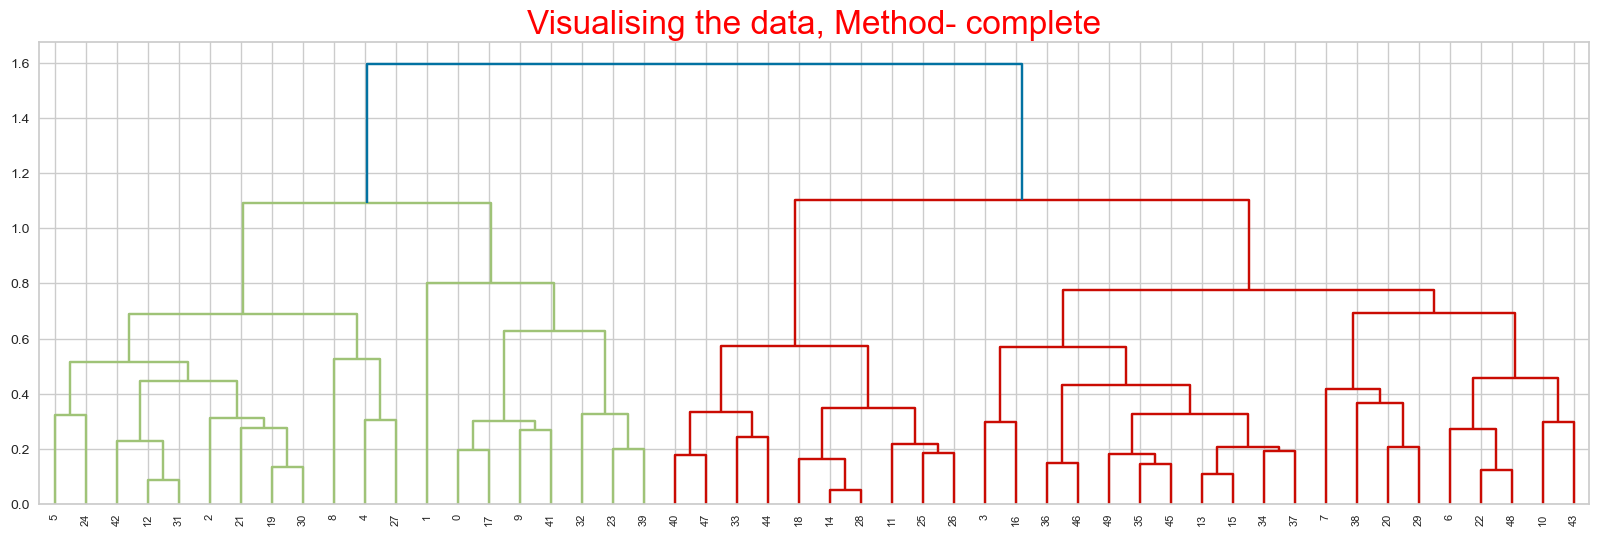

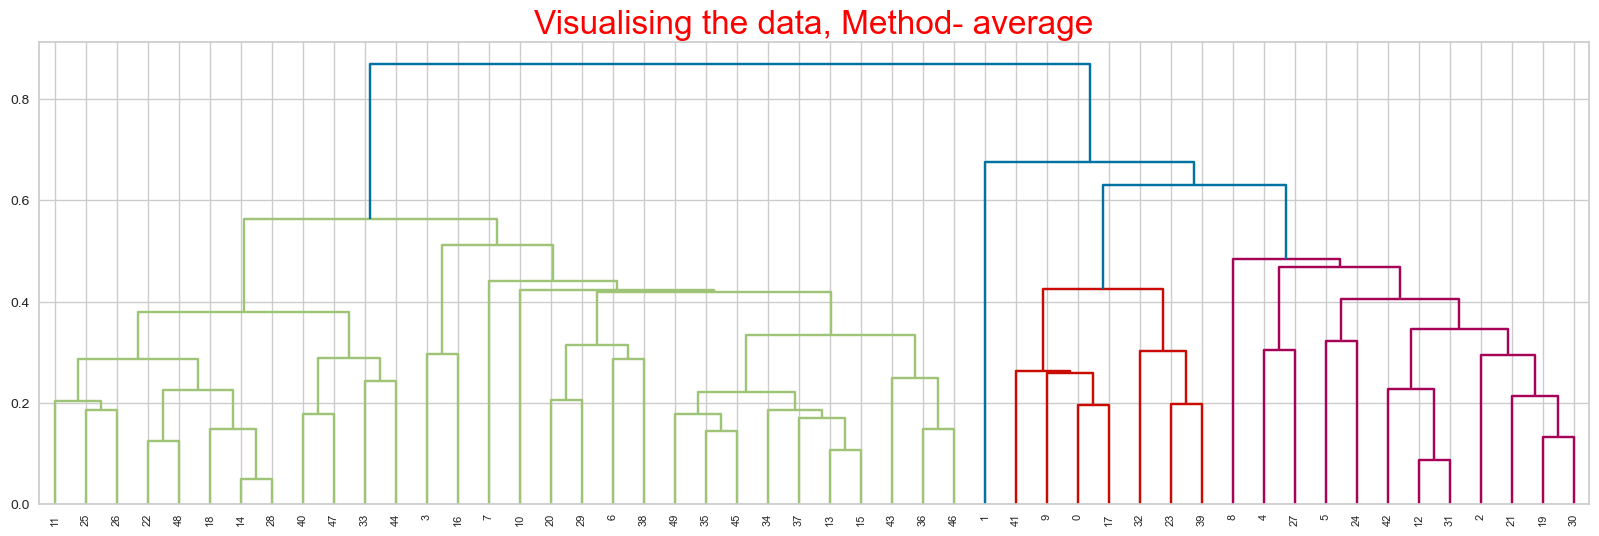

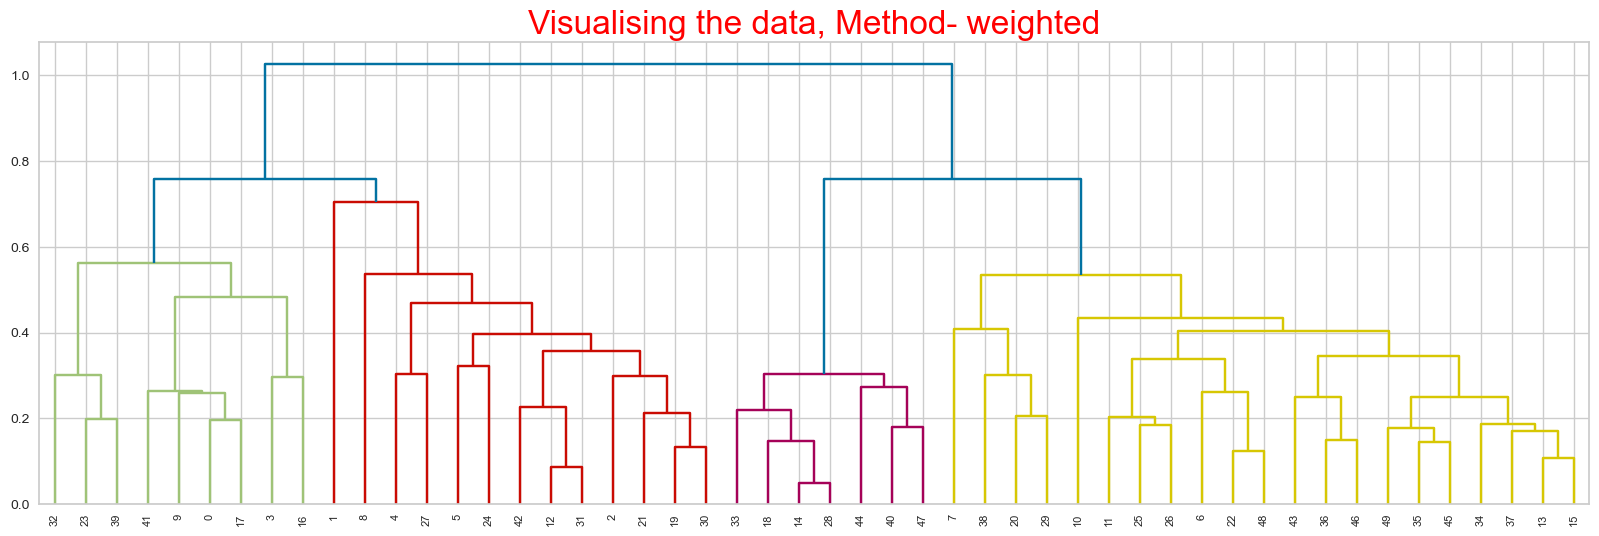

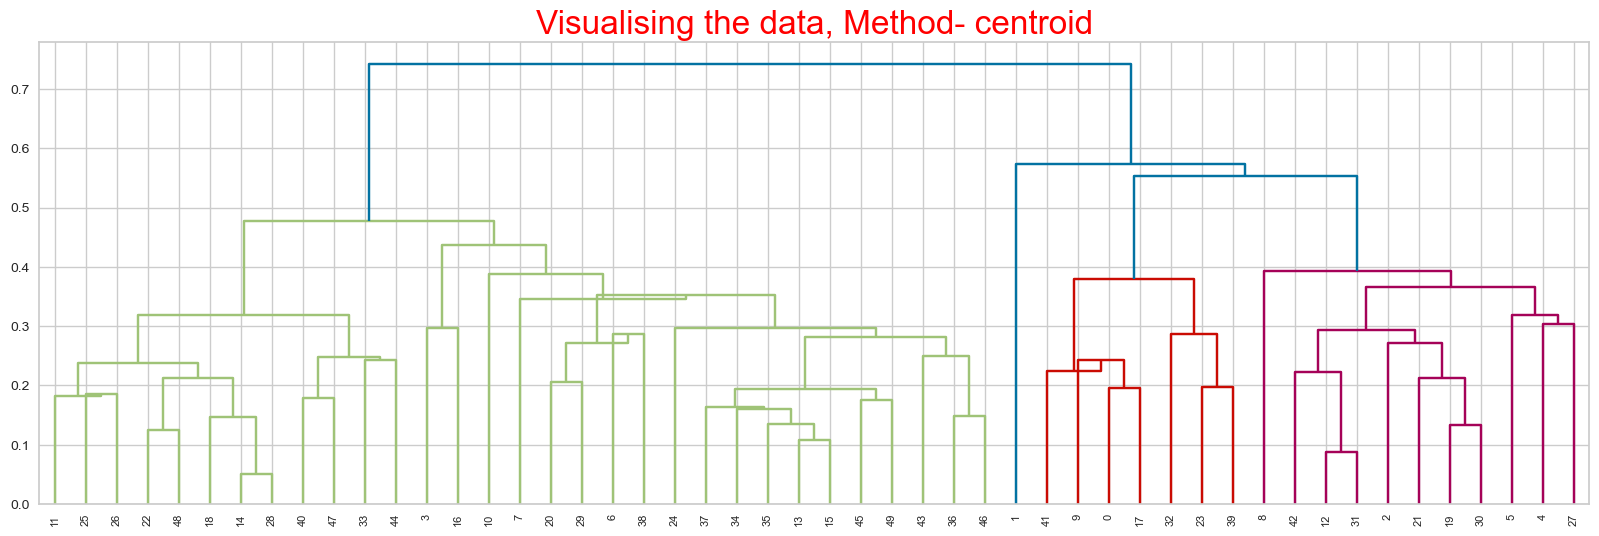

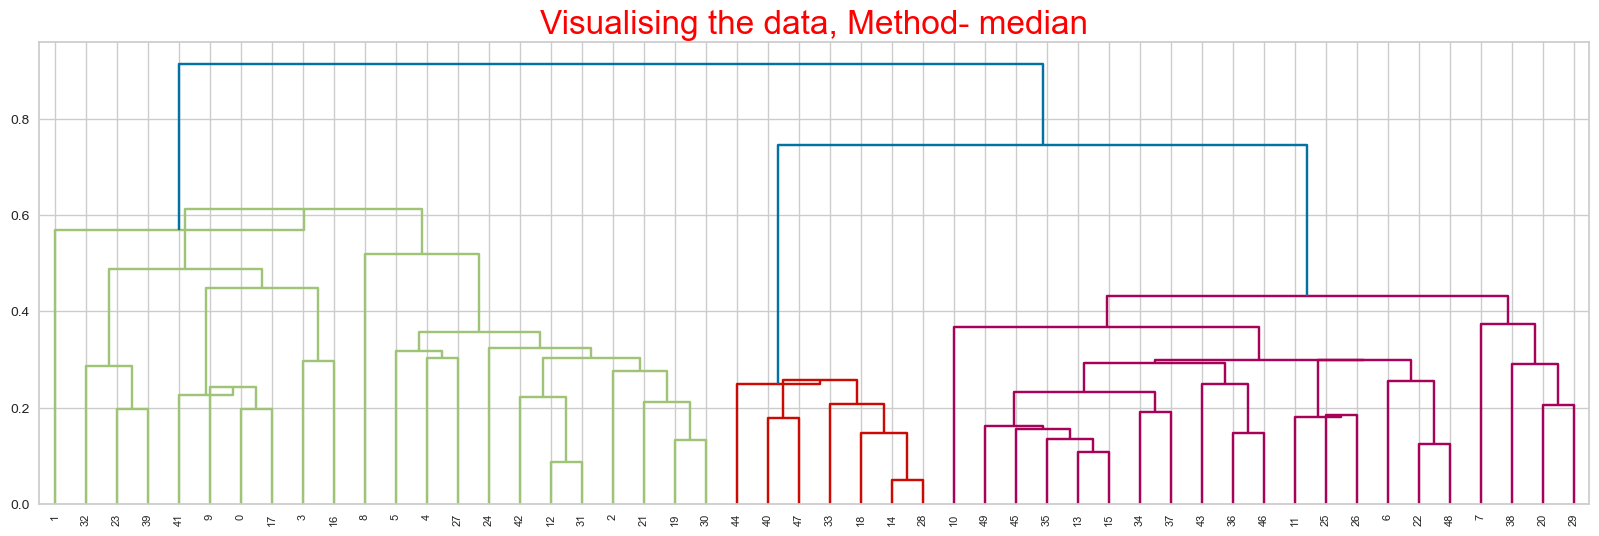

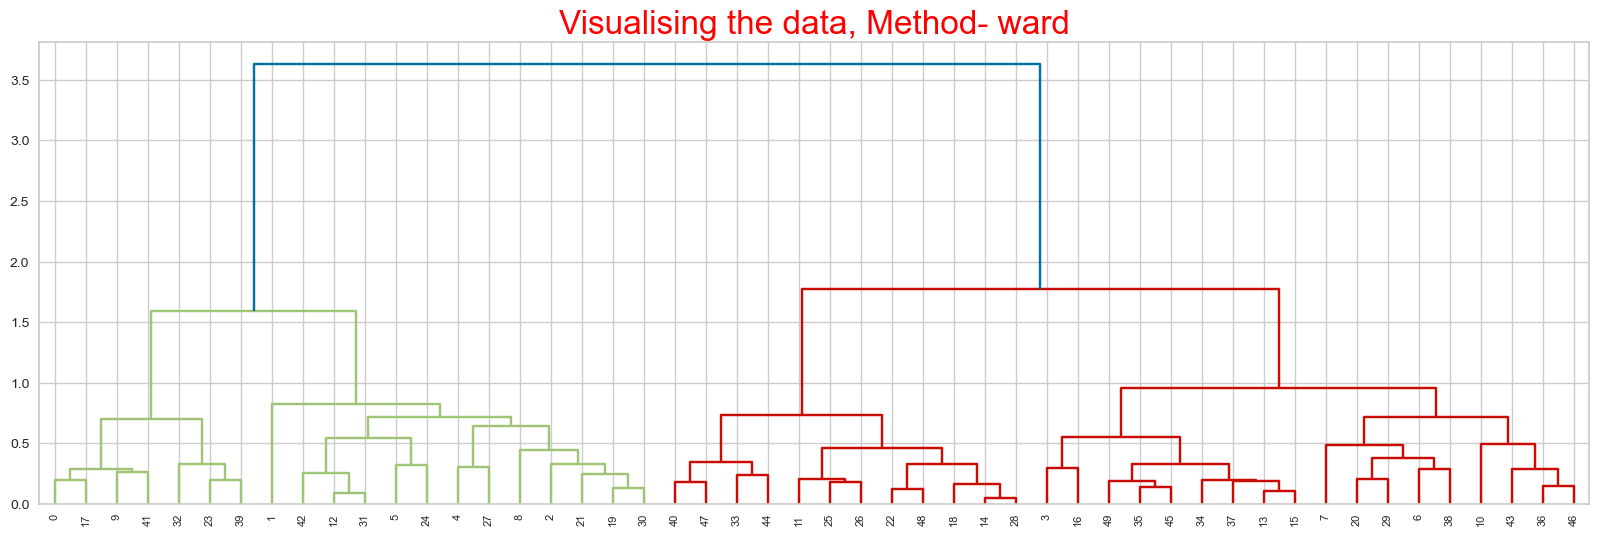

In [67]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'red'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(mmx_df, method = methods,optimal_ordering=False))
    

In [68]:
#silhoutte score for minmax scaled data
n_clusters = [2,3,4,5,6,7,8]  

for i in n_clusters:
    for b in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=i,linkage=b) 
        hie_labels1 = hie_cluster1.fit_predict(mmx_df)
        silhouette_score1 = sil(mmx_df, hie_labels1)
        print("For n_clusters =", i,"The average silhouette_score with linkage-",b, ':',silhouette_score1)
    print()
#2 clusters is the optimal number of clusters

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.32987073799867855
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3699239114027

# DENDROGRAM FOR STANADARD SCALED DATA

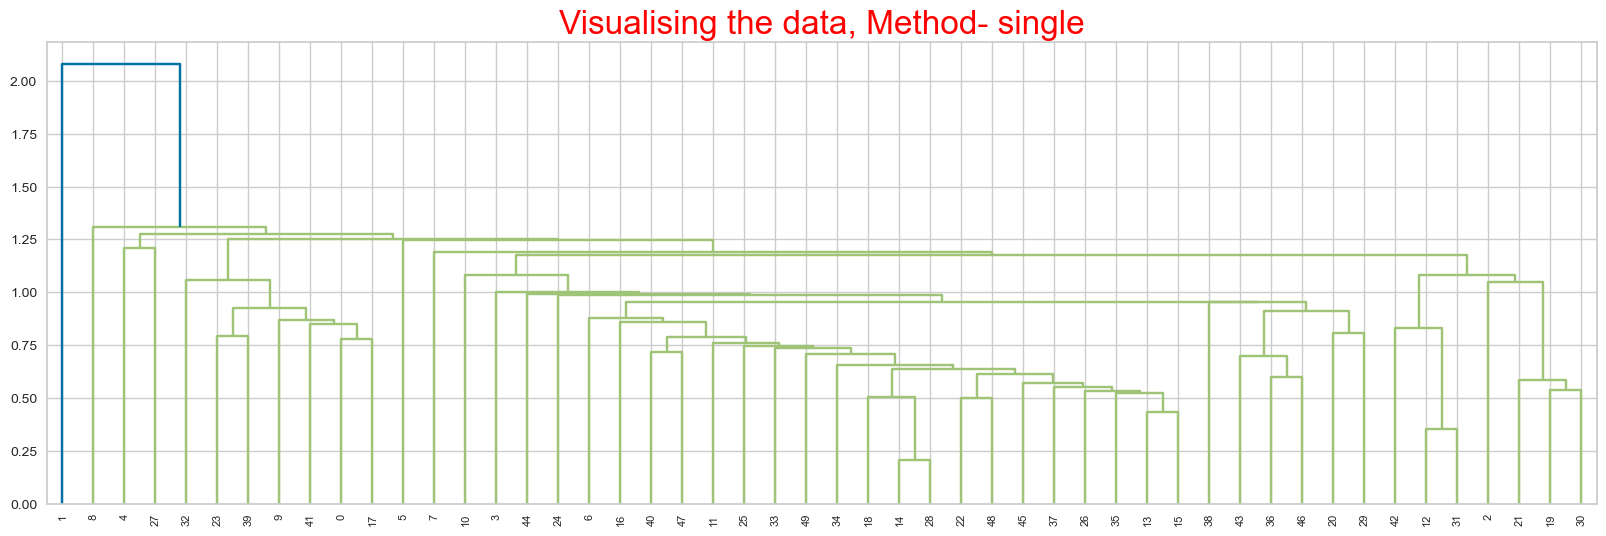

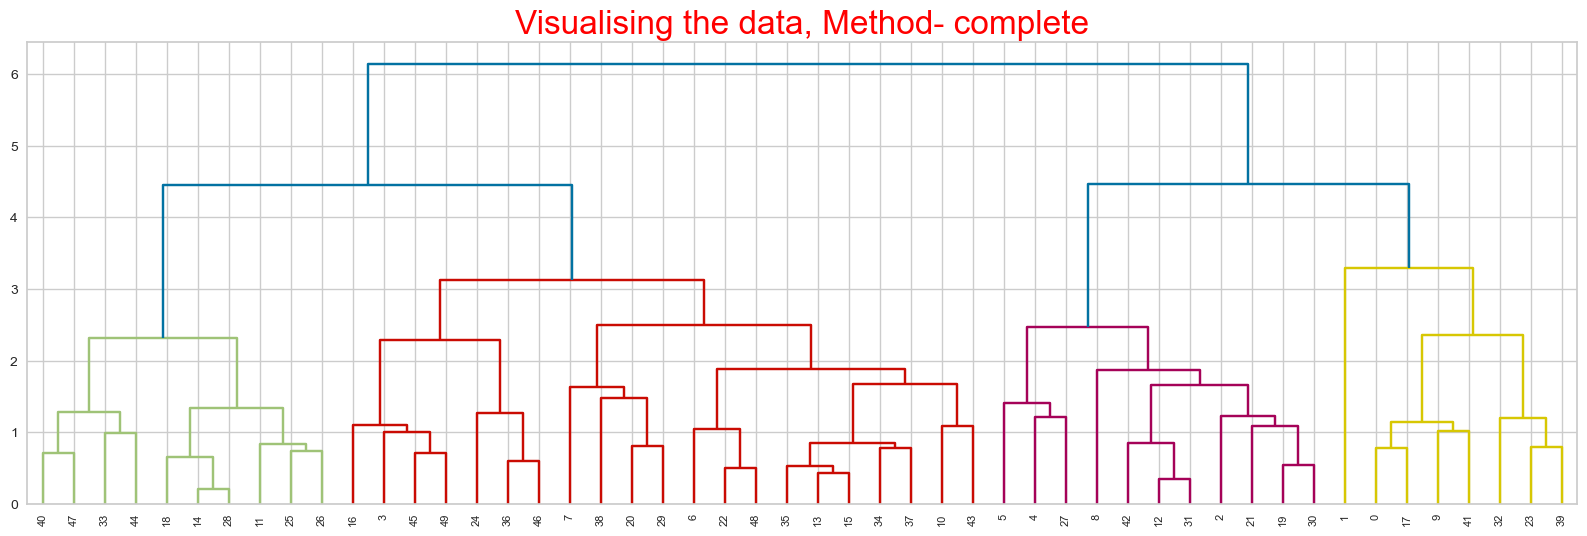

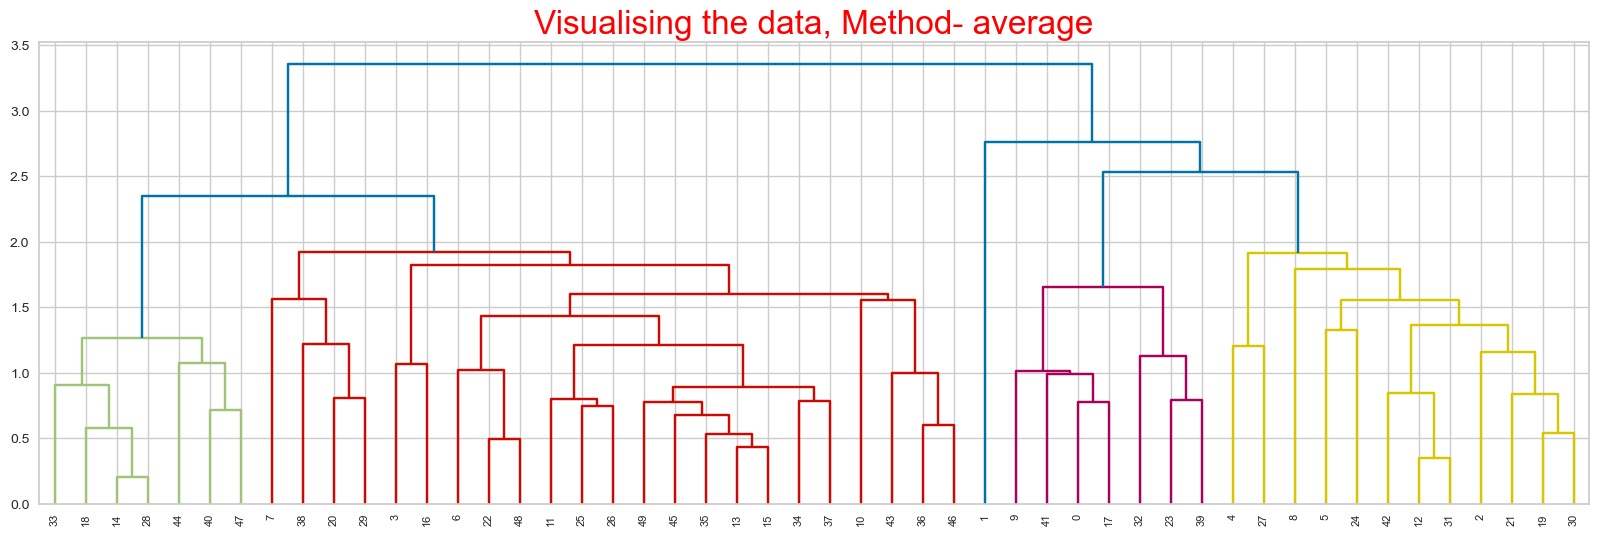

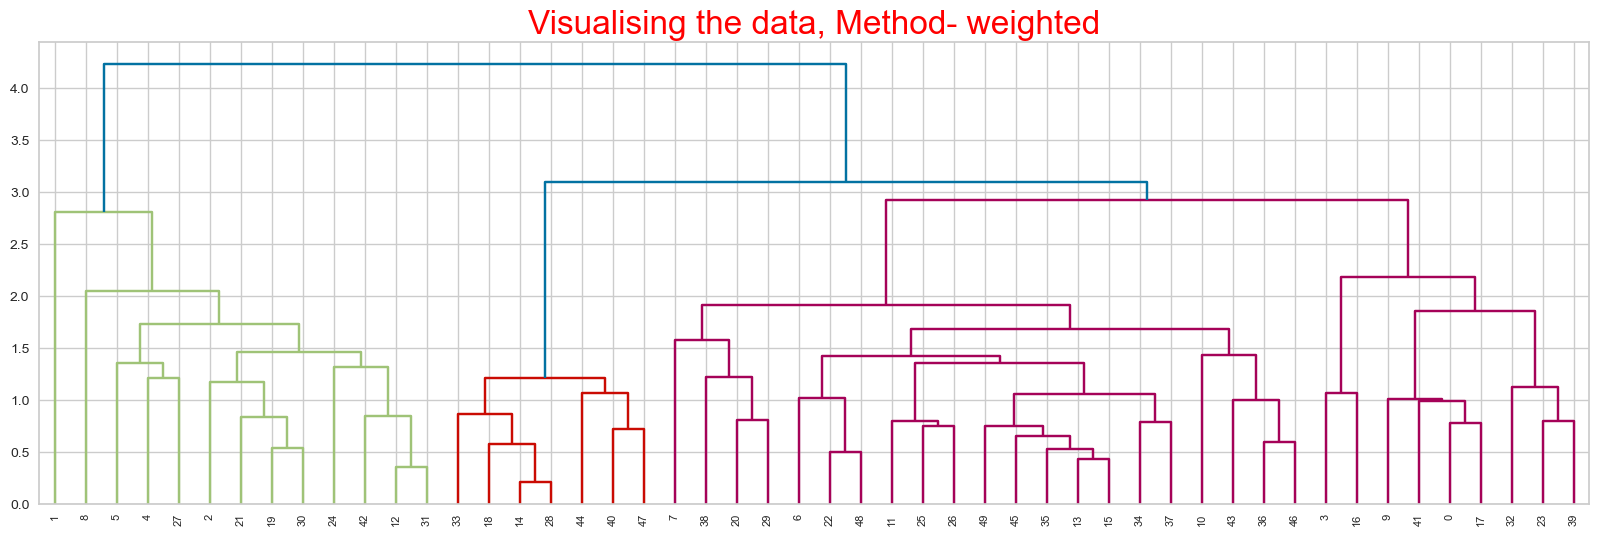

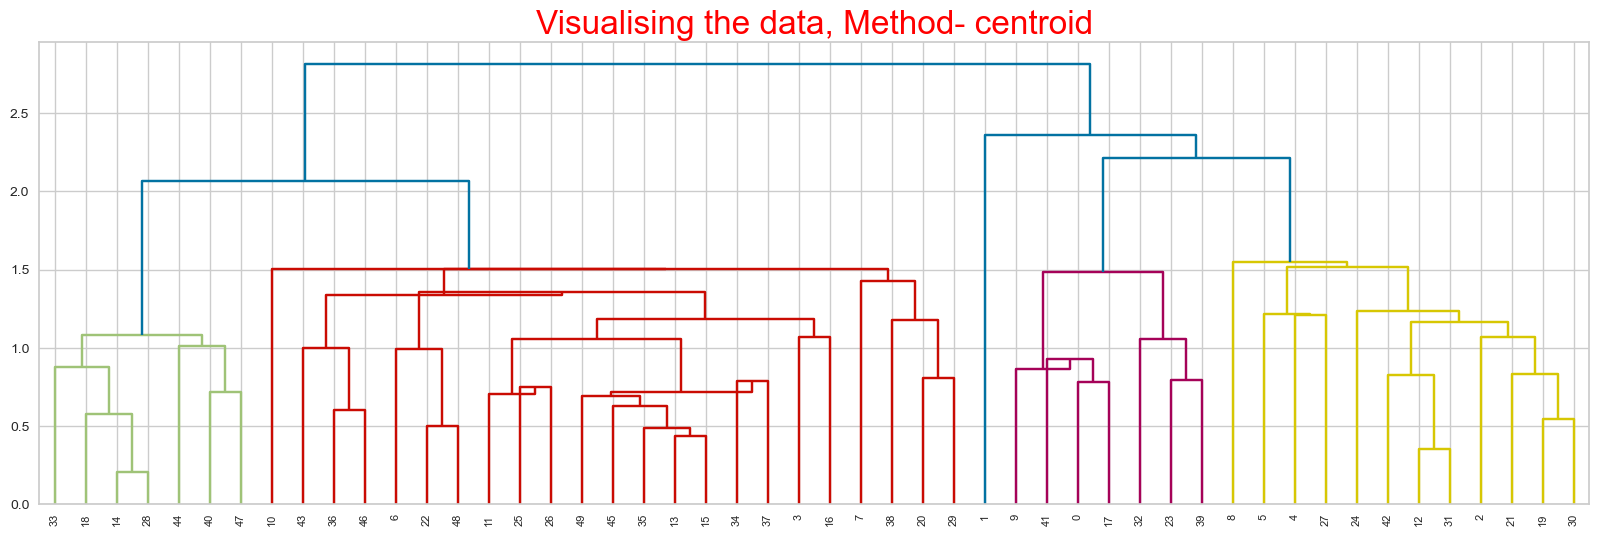

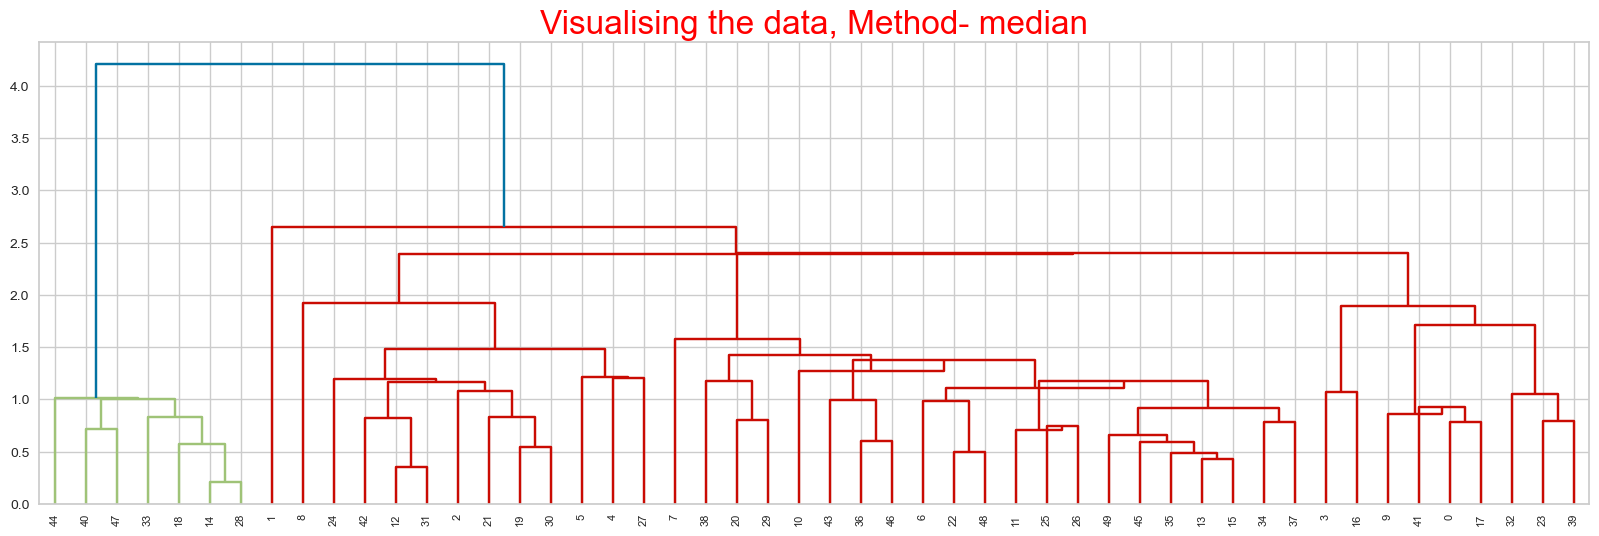

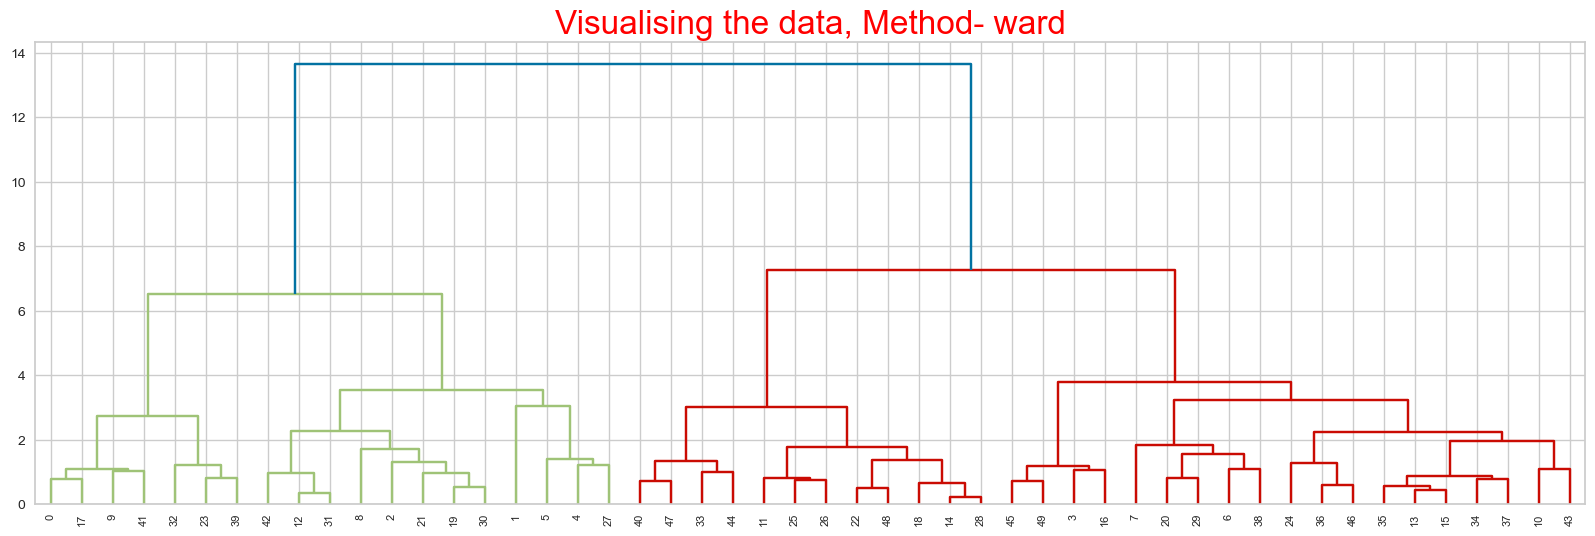

In [69]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'red'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(std_df, method = methods,optimal_ordering=False))
    

In [70]:
#silhoutte score for standard  scaled data
n_clusters = [2,3,4,5,6,7,8,9,10]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3103635817402789
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.1458234362517026

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221
F

# PCA

# application of PCA in standard data

In [71]:
pca_std = PCA(random_state=10, n_components=.95)
pca_std_df= pca_std.fit_transform(std_df)
print(pca_std.singular_values_)

[11.13607107  7.0347891   4.22234047]


In [72]:
#calculating variance 
print(pca_std.explained_variance_ratio_*100)

[62.00603948 24.74412881  8.91407951]


In [73]:
# calculating cumulative variance ratio
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([62.00603948, 86.75016829, 95.66424781])

<Axes: xlabel='PC1', ylabel='PC2'>

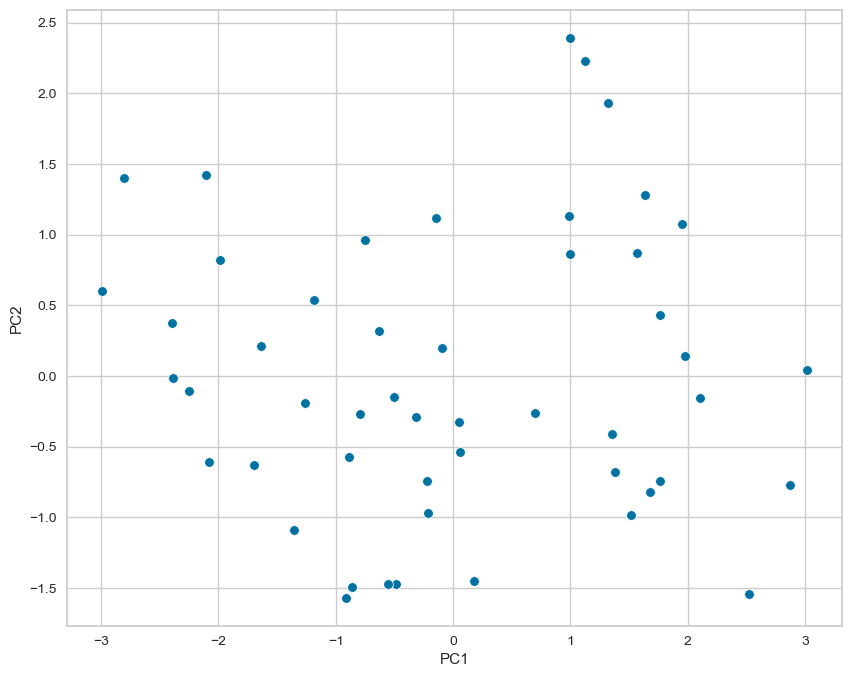

In [74]:
principal_components = pca_std.fit_transform(std_df)
# Create a new DataFrame with the principal components and target variable (if applicable)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

if 'Hierarchical_labels' in crime.columns:
    pc_df['target'] = crime['Hierarchical_labels']

# Plot the principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pc_df, x='PC1', y='PC2')


In [75]:
principal_components

array([[ 0.98556588,  1.13339238, -0.44426879],
       [ 1.95013775,  1.07321326,  2.04000333],
       [ 1.76316354, -0.74595678,  0.05478082],
       [-0.14142029,  1.11979678,  0.11457369],
       [ 2.52398013, -1.54293399,  0.5985568 ],
       [ 1.51456286, -0.98755509,  1.09500699],
       [-1.35864746, -1.08892789, -0.64325757],
       [ 0.04770931, -0.32535892, -0.71863294],
       [ 3.01304227,  0.03922851, -0.57682949],
       [ 1.63928304,  1.2789424 , -0.34246008],
       [-0.91265715, -1.57046001,  0.05078189],
       [-1.63979985,  0.21097292,  0.25980134],
       [ 1.37891072, -0.68184119, -0.67749564],
       [-0.50546136, -0.15156254,  0.22805484],
       [-2.25364607, -0.10405407,  0.16456432],
       [-0.79688112, -0.2701647 ,  0.02555331],
       [-0.75085907,  0.95844029, -0.02836942],
       [ 1.56481798,  0.87105466, -0.78348036],
       [-2.39682949,  0.37639158, -0.06568239],
       [ 1.76336939,  0.42765519, -0.15725013],
       [-0.48616629, -1.4744965 , -0.609

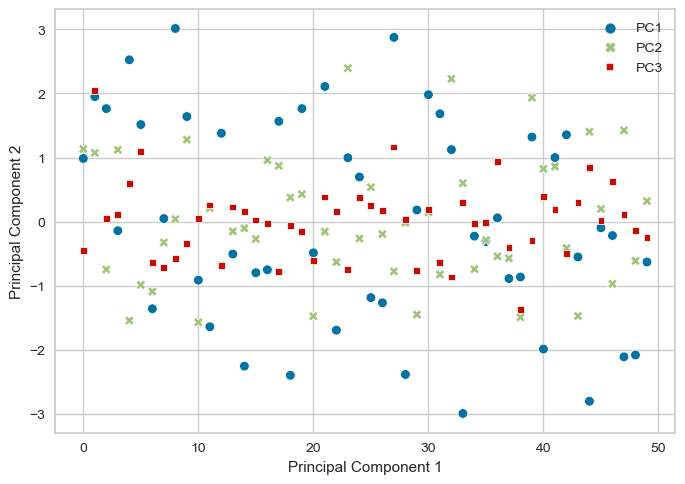

In [76]:
sns.scatterplot(pc_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [77]:
n_clusters = [2,3,4,5,6,7,8] 

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels2 = hie_cluster2.fit_predict(pca_std_df)
        silhouette_score2 = sil(pca_std_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4265110406142639
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4265110406142639
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4265110406142639
For n_clusters = 2 The average silhouette_score with linkage- single : 0.24345883776062255

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.33876375545433696
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.3915503289909142
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3688801036789719
For n_clusters = 3 The average silhouette_score with linkage- single : 0.15378814316621917

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3643498454693872
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3135738413887402
For n_clusters = 4 The average silhouette_score with linkage- average : 0.38426794954896143
F

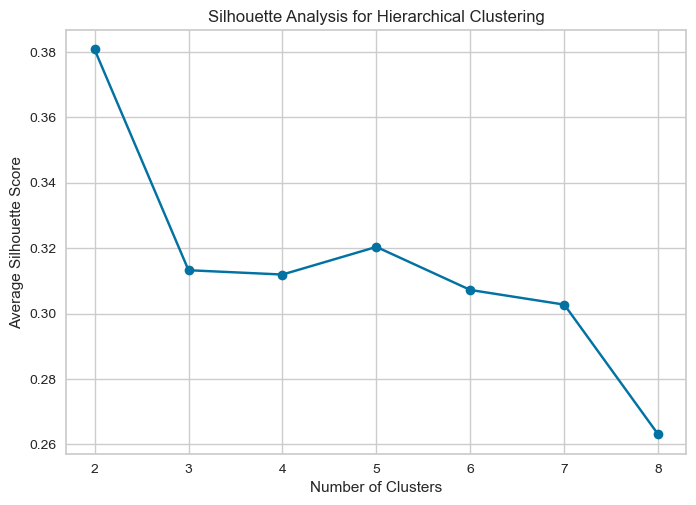

plot will show the trend of the average silhouette score as the number of clusters increases. The optimal number of clusters is typically where the average silhouette score is highest


In [78]:

n_clusters = [2, 3, 4, 5, 6, 7, 8]
linkages = ["ward", "complete", "average", "single"]

avg_silhouette_scores = []
for n in n_clusters:
    silhouette_scores = []
    for link in linkages:
        hie_cluster = AgglomerativeClustering(n_clusters=n, linkage=link)
        hie_labels = hie_cluster.fit_predict(pca_std_df)
        silhouette_score = sil(pca_std_df, hie_labels)
        silhouette_scores.append(silhouette_score)
    avg_silhouette_score = sum(silhouette_scores) / len(silhouette_scores)
    avg_silhouette_scores.append(avg_silhouette_score)

plt.plot(n_clusters, avg_silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Hierarchical Clustering')
plt.show()
print("plot will show the trend of the average silhouette score as the number of clusters increases. The optimal number of clusters is typically where the average silhouette score is highest")

# application of PCA in MINMAX SCALED DATA

In [79]:

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(mmx_df)

In [80]:
print(pca_minmax.singular_values_)

[2.91098167 1.73395131 1.03326488]


In [81]:
print(pca_minmax.explained_variance_ratio_*100)

[64.27287274 22.80460563  8.09789428]


<Axes: xlabel='PC1', ylabel='PC2'>

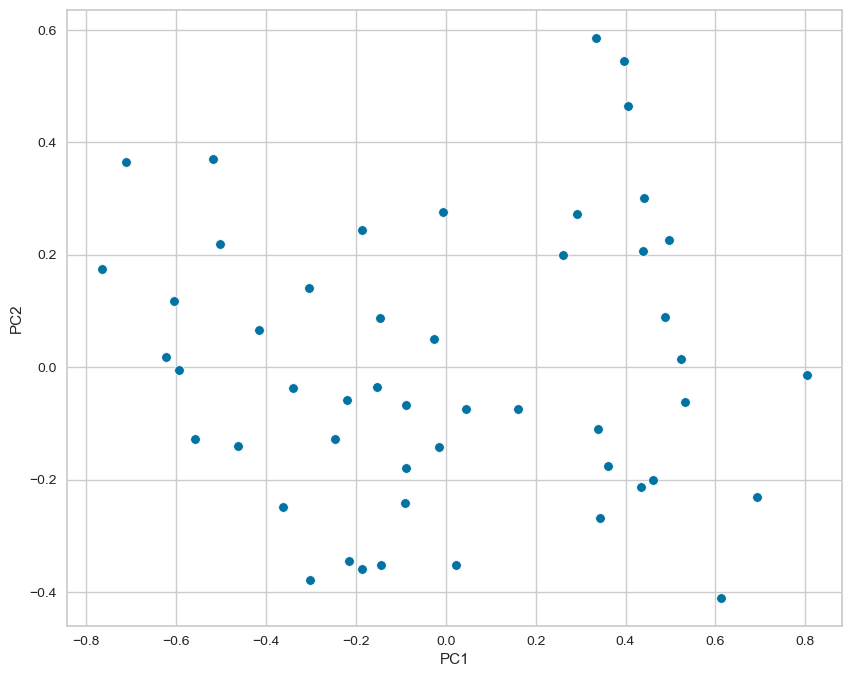

In [82]:
# Perform PCA with 2 components
pca_mmx = PCA(random_state=10, n_components=0.95)
principal_components = pca_mmx.fit_transform(mmx_df)

# Create a new DataFrame with the principal components and target variable (if applicable)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
if 'Hierarchical_labels' in crime.columns:
    pc_df['target'] = data['Hierarchical_labels']

# Plot the principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pc_df, x='PC1', y='PC2')

In [83]:
pc_df

,PC1,PC2,PC3
0,0.293082,0.273177,-0.098603
1,0.497299,0.225498,0.501542
2,0.460302,-0.201380,0.003031
3,-0.006003,0.275698,0.028729
4,0.612016,-0.409985,0.143261
5,0.342323,-0.268101,0.268758
6,-0.363487,-0.248338,-0.167453
7,0.044244,-0.073746,-0.190667
8,0.802927,-0.014672,-0.132437
9,0.441129,0.301578,-0.056340


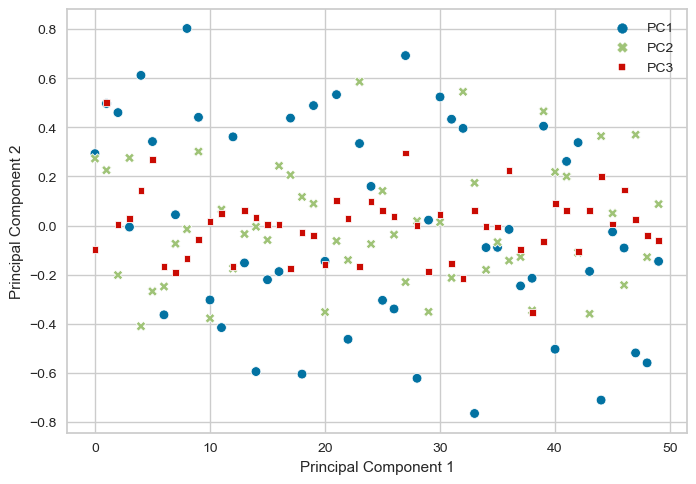

In [84]:
sns.scatterplot(pc_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [85]:
n_clusters = [2,3,4,5,6,7,8] 

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = sil(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4457800070504953
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42782719718400747
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4457800070504953
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21618310204304791

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3476112356935249
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.3294280291525284
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3743823828091996
For n_clusters = 3 The average silhouette_score with linkage- single : 0.1486703540496942

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.35863519696982105
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.34366468006840584
For n_clusters = 4 The average silhouette_score with linkage- average : 0.39526852723825706


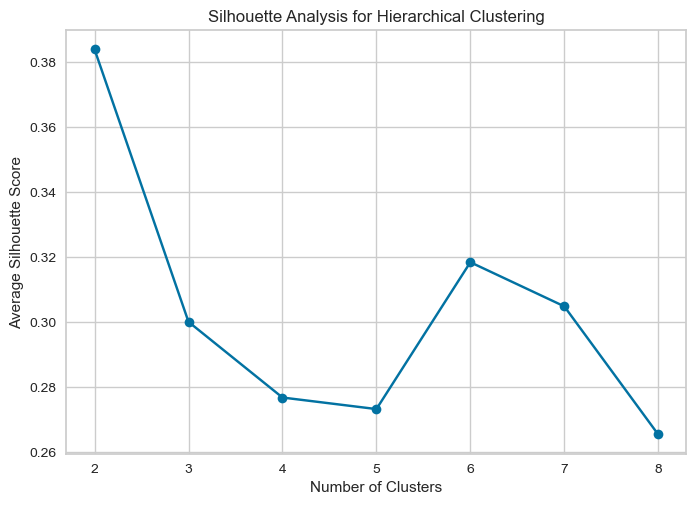

plot will show the trend of the average silhouette score as the number of clusters increases. The optimal number of clusters is typically where the average silhouette score is highest


In [86]:

n_clusters = [2, 3, 4, 5, 6, 7, 8]
linkages = ["ward", "complete", "average", "single"]

avg_silhouette_scores = []
for n in n_clusters:
    silhouette_scores = []
    for link in linkages:
        hie_cluster = AgglomerativeClustering(n_clusters=n, linkage=link)
        hie_labels = hie_cluster.fit_predict(pca_minmax_df)
        silhouette_score = sil(pca_minmax_df, hie_labels)
        silhouette_scores.append(silhouette_score)
    avg_silhouette_score = sum(silhouette_scores) / len(silhouette_scores)
    avg_silhouette_scores.append(avg_silhouette_score)

plt.plot(n_clusters, avg_silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Hierarchical Clustering')
plt.show()
print("plot will show the trend of the average silhouette score as the number of clusters increases. The optimal number of clusters is typically where the average silhouette score is highest")

# Agglomerative Clustering

In [87]:
# Perform Agglomerative Clustering with 2 clusters and 'ward' linkage
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)

In [88]:
# Print the shape of the resulting cluster labels and the labels themselves
print("Shape of cluster labels:", y_pred_hie.shape)
print("Cluster labels:", y_pred_hie)

Shape of cluster labels: (50,)
Cluster labels: [1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0]


In [89]:
from sklearn.metrics import  silhouette_score
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
score = (silhouette_score(pca_std_df, y_pred_hie)*100).round(3)
print(f"Silhouette score: {score}")

Silhouette score: 42.651


In [90]:
agg_clustering.n_clusters_

2

In [91]:
crime['Hierarchical_labels'] = agg_clustering.labels_
crime.head(10)

,States,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,2,0
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,2,0
7,Delaware,5.9,238,72,15.8,2,0
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,1,1


In [92]:
crime.groupby('Hierarchical_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label
,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,
0,5.003226,116.483871,63.838710,16.338710,1.16129
1,12.331579,259.315789,68.315789,29.215789,1.00000


# DBSCAN

# DBSCAN on Standard Scaled data

In [93]:
mmx_df

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [94]:
from itertools import product

In [95]:
eps_values = np.arange(0.25,2,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [96]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


In [97]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(std_df, DBS_clustering.labels_))

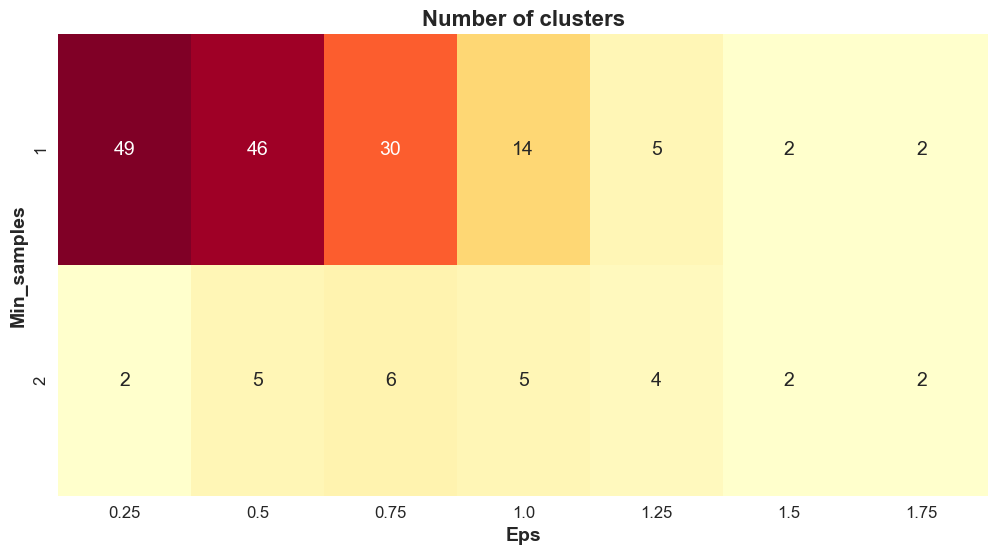

In [98]:
# Create a DataFrame from the DBSCAN parameters and number of clusters
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

# Pivot the DataFrame to create a heatmap
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

# Plot the heatmap with customized settings
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 14}, cmap="YlOrRd", fmt='.0f', cbar=False, ax=ax)
ax.set_title('Number of clusters', fontsize=16, fontweight='bold')
ax.set_xlabel('Eps', fontsize=14, fontweight='bold')
ax.set_ylabel('Min_samples', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
plt.show()

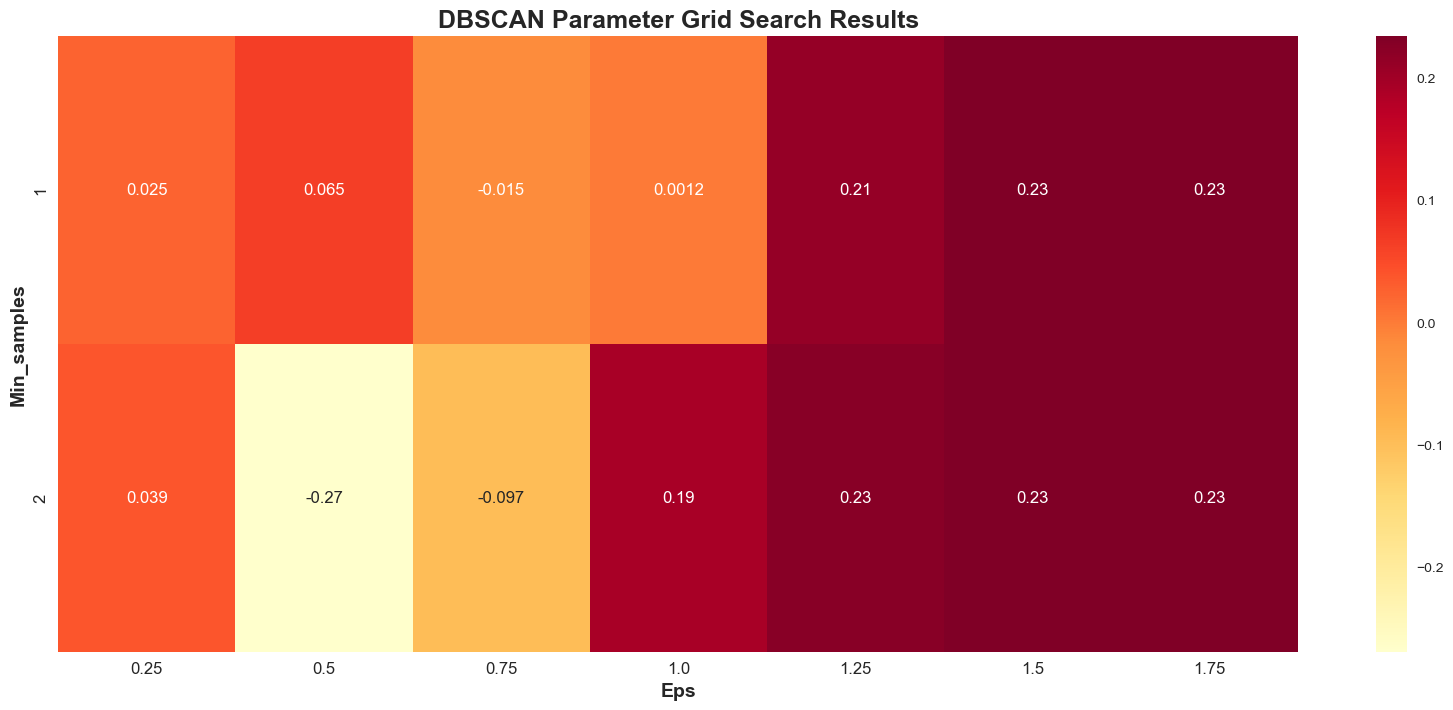

In [99]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 12}, cmap="YlOrRd", ax=ax)
ax.set_title('DBSCAN Parameter Grid Search Results', fontsize=18, fontweight='bold')
ax.set_xlabel('Eps', fontsize=14, fontweight='bold')
ax.set_ylabel('Min_samples', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [100]:
dbscan = DBSCAN(eps=1.5, min_samples=1) 
dbscan.fit(std_df)

DBSCAN(eps=1.5, min_samples=1)

In [101]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [102]:
crime['DBSCAN_labels'] = dbscan.labels_
crime.head()

,States,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels,DBSCAN_labels
0,Alabama,13.2,236,58,21.2,1,1,0
1,Alaska,10.0,263,48,44.5,1,1,1
2,Arizona,8.1,294,80,31.0,1,1,0
3,Arkansas,8.8,190,50,19.5,2,0,0
4,California,9.0,276,91,40.6,1,1,0


In [103]:
crime.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels
,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,1.102041,0.367347
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [104]:
#silhoutte  score for dbscan
print("Silhouette Coefficient: %0.3f" % sil(std_df, dbscan.labels_))

Silhouette Coefficient: 0.235


# DBSCAN on MinMax Scaled Data

In [105]:
mmx_df

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [106]:
from itertools import product

eps_values = np.arange(0.25,2,0.25) 
min_samples = np.arange(1,3)
DBSCAN_params = list(product(eps_values, min_samples))

In [107]:
DBS_clustering.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [108]:
epsilon = [0.25,0.5]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(mmx_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(mmx_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


In [109]:
sil_score

[0.02524285085226844,
 0.0388176260293987,
 0.06502546728043573,
 -0.2689925316677858,
 -0.015304812731762233,
 -0.0972896154014516,
 0.0011630308334708128,
 0.19290975823254833,
 0.21127138005172738,
 0.2257103196361524,
 0.23455598753159795,
 0.23455598753159795,
 0.23455598753159795,
 0.23455598753159795]

In [110]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(mmx_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


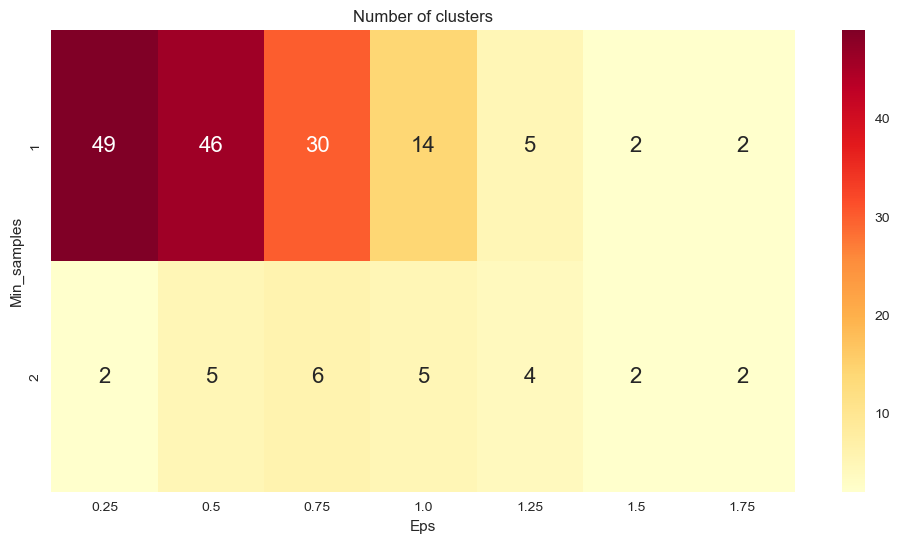

In [111]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlOrRd", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

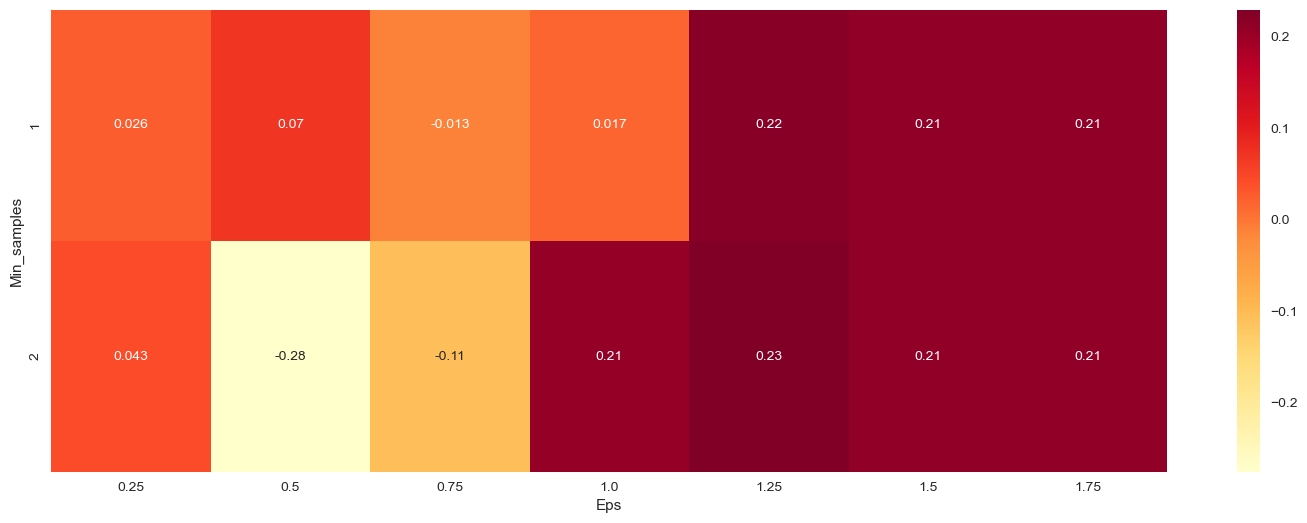

In [112]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlOrRd", ax=ax)
plt.show()


In [113]:
dbscan = DBSCAN(eps=0.5, min_samples=1) 
dbscan.fit(mmx_df)

DBSCAN(min_samples=1)

In [114]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [115]:
crime['DBSCAN_labels'] = dbscan.labels_
crime.head()

,States,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels,DBSCAN_labels
0,Alabama,13.2,236,58,21.2,1,1,0
1,Alaska,10.0,263,48,44.5,1,1,1
2,Arizona,8.1,294,80,31.0,1,1,0
3,Arkansas,8.8,190,50,19.5,2,0,0
4,California,9.0,276,91,40.6,1,1,0


In [116]:
crime.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels
,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,1.102041,0.367347
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [117]:
cluster1 = pd.DataFrame(crime.loc[crime.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(crime.loc[crime.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Kmeans_label,1.102041,1.0
Hierarchical_labels,0.367347,1.0
DBSCAN_labels,0.000000,1.0


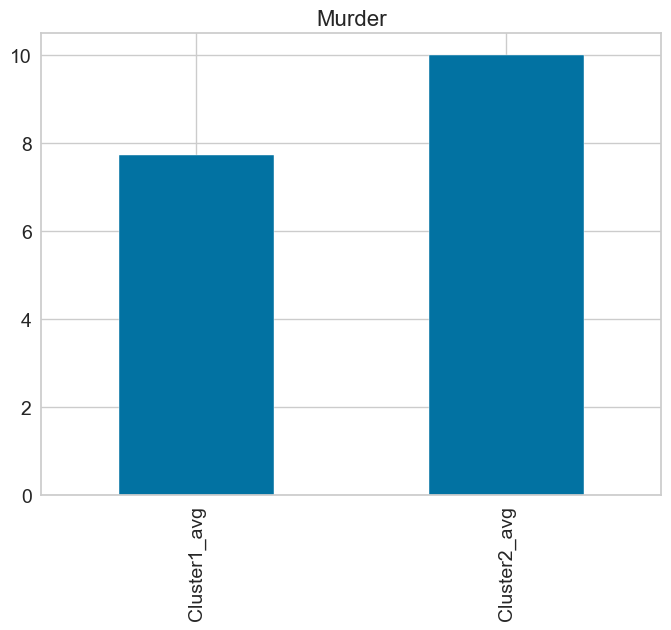

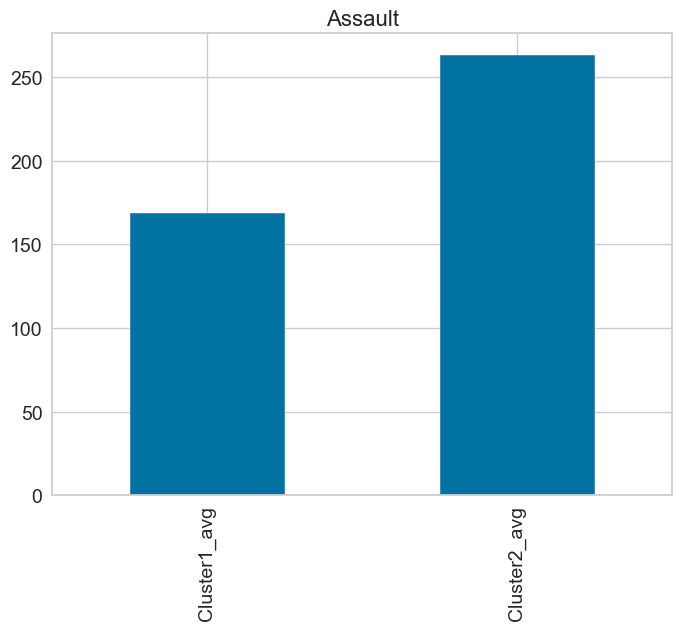

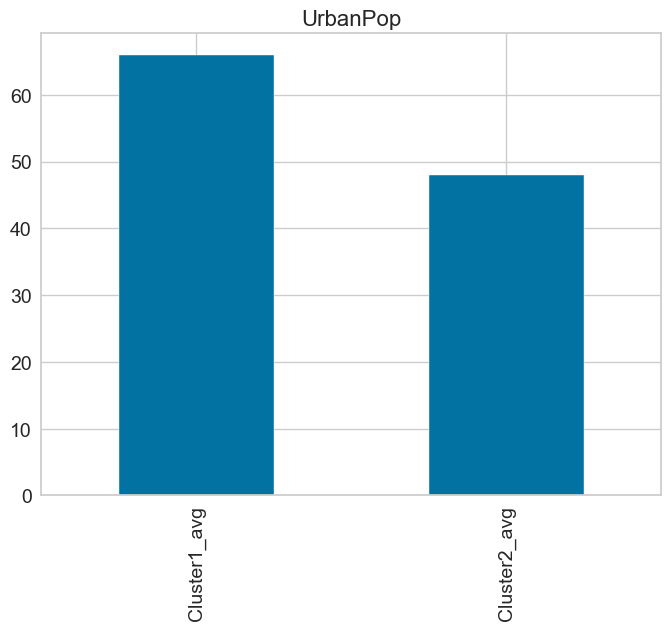

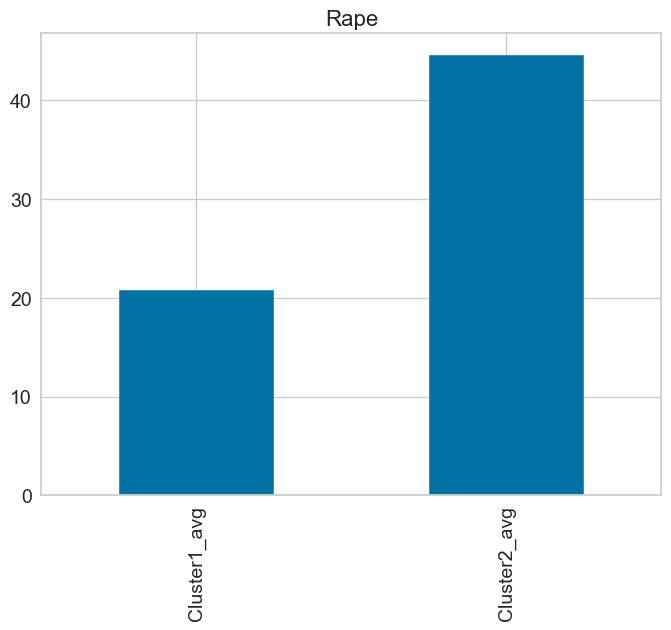

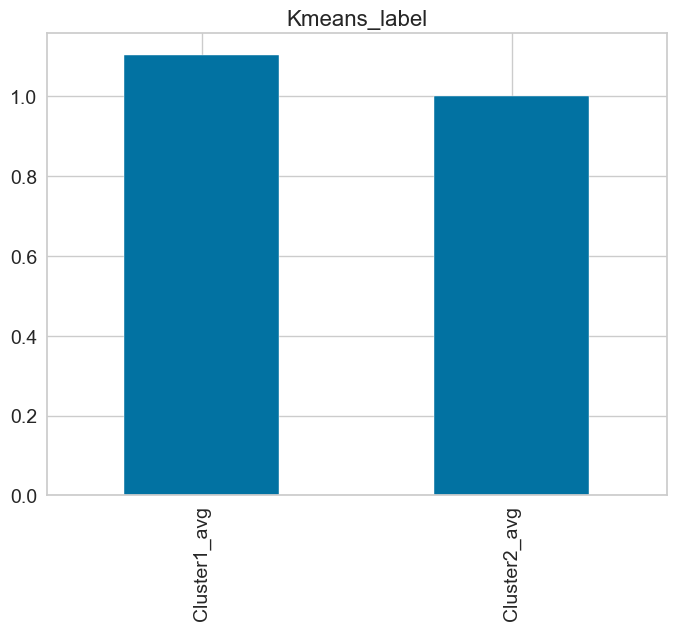

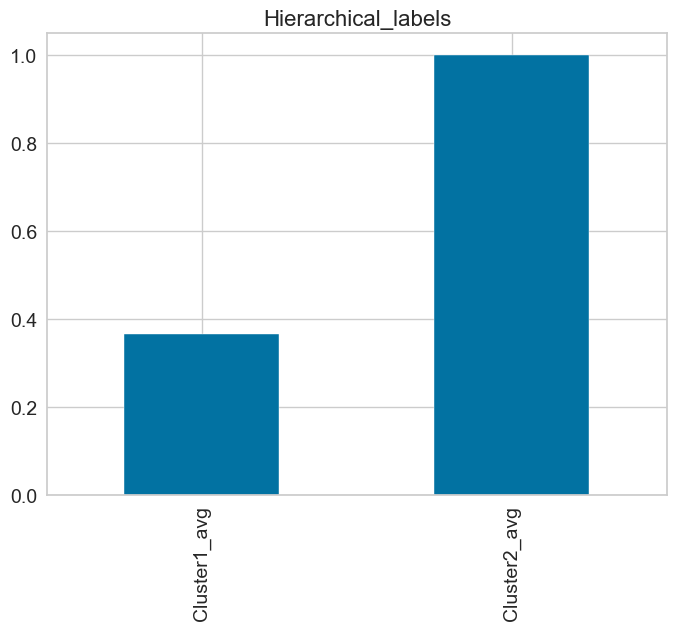

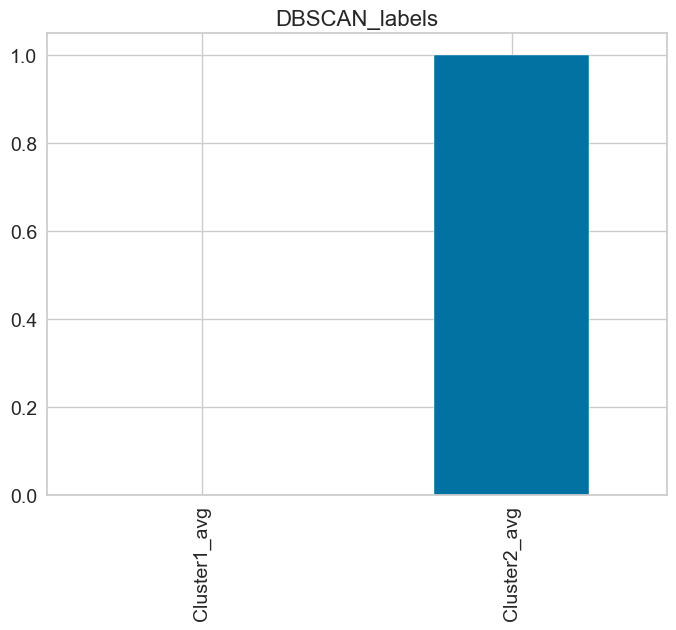

In [118]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    